# 1 Intro

Déclinasion du P7_2_V0:
- Dans un 1er temps selection pour X_train et X_test des features dans laquelle les features catégorielles sont transformées via OneHotEncoder()
- Dans un 2nd avec feat cat passées en booléen (quand possible)


## 1.1. Import

In [2]:
from libraries import *

## 1.2 Fonctions utiles / set-up

In [3]:
from fonctions import *

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
DISPLAY=True

"""If Dispaly == False then all cell starting starting with 'If Display=True' won't be ran.
Else they will

This short function allows to by-pass instructions which are long to run (ex MSNO on huge dataset or sns.pairplot)"""

"If Dispaly == False then all cell starting starting with 'If Display=True' won't be ran.\nElse they will\n\nThis short function allows to by-pass instructions which are long to run (ex MSNO on huge dataset or sns.pairplot)"

In [6]:
def print_score(y_test,y_pred):
    '''Fonction permettant les différents scores pertinents pour classification'''
    print(f'Accuracy score = {accuracy_score(y_test, y_pred)}')
    print(f'Precision score = {precision_score(y_test, y_pred)}')
    print (f'Recall score = {recall_score(y_test,y_pred)}')
    print (f'F1 score = {f1_score(y_test,y_pred)}')
    print (f'ROC AUC score = {roc_auc_score(y_test,y_pred)}')   

In [34]:
def result(grid, log_target=0,transf_feat=0, features=''):
    ''' Fonction retournant un dataframe res recensant les différents résultats du GridSearchCv passé en fonction des paramétres utilisés'''
    res=pd.DataFrame(grid.cv_results_).round(2)
    cols=[i for i in res.columns if 'split' not in i ]
    res=res.loc[:,cols]
    ###
    
    res['log_target']=log_target
    res['transf_feat']=transf_feat
    res['features']=features
    
    ###
    
    return res#.sort_values("", ascending =True)

# 2. Data

## 2.1 Import and display

In [7]:
train_V1=pd.read_csv('train_V1.csv')

In [8]:
train_V1.shape

(307490, 23)

In [9]:
train_V1.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship
0,100002,1,0,NaN,1,House / apartment,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,Secondary / secondary special,1.0,0.083037,0.262949,0.139376,25,2.0,1,0,1,0
1,100003,0,0,NaN,0,House / apartment,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,Higher education,2.0,0.311267,0.622246,NaN,45,3.0,1,1,1,1
2,100004,0,1,26.0,1,House / apartment,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,Secondary / secondary special,1.0,NaN,0.555912,0.729567,52,1.0,0,0,1,0
3,100006,0,0,NaN,1,House / apartment,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,Secondary / secondary special,2.0,NaN,0.650442,NaN,52,8.0,1,1,1,1
4,100007,0,0,NaN,1,House / apartment,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,Secondary / secondary special,1.0,NaN,0.322738,NaN,54,8.0,1,0,1,0


Select only 20% du dataset pour accelerer divers fits ci dessous

In [10]:
train_V1=train_V1.sample(frac=0.2)
train_V1.shape

(61498, 23)

In [11]:
#train_V0['nb_annuity?']=train_V0['AMT_CREDIT']/train_V0['AMT_ANNUITY']

# 3 Phase 0: MachineLearning / Baseline
- Sur base Application Train
- Dummy Classifier

## 3.1. Séparation du jeu de données (features: X / target:y)
 et suppression de colonnes inutiles

In [12]:
X=train_V1.drop(['SK_ID_CURR','TARGET','OWN_CAR_AGE','NAME_HOUSING_TYPE','AMT_GOODS_PRICE','active_client','relationship'],axis=1)
X.shape

(61498, 16)

In [13]:
y=train_V1['TARGET']
y.shape

(61498,)

In [14]:
num_feat=X.select_dtypes(exclude=object).columns.to_list()
num_feat

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'client_age',
 'client_prof_exp',
 'Cash_loans',
 'GENDER_FEMALE']

In [15]:
cat_feat=X.select_dtypes(include=object).columns.to_list()
cat_feat

['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE']

## 3.3 Train-test split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
print('Train set:',X_train.shape)
print('Test set:',X_test.shape)
print('Train target:',y_train.shape)
print('Test target:',y_test.shape)

Train set: (49198, 16)
Test set: (12300, 16)
Train target: (49198,)
Test target: (12300,)


## 3.4 Entrainement du DummyClassifier

In [18]:
dc=DummyClassifier()

In [19]:
dc.fit(X_train,y_train)

DummyClassifier()

In [20]:
dc_pred=dc.predict(X_test)

In [21]:
acc=accuracy_score(y_test, dc_pred)
acc

0.9204878048780488

In [22]:
error=1-dc.score(X_test,y_test)
error

0.07951219512195118

In [23]:
1-acc


0.07951219512195118

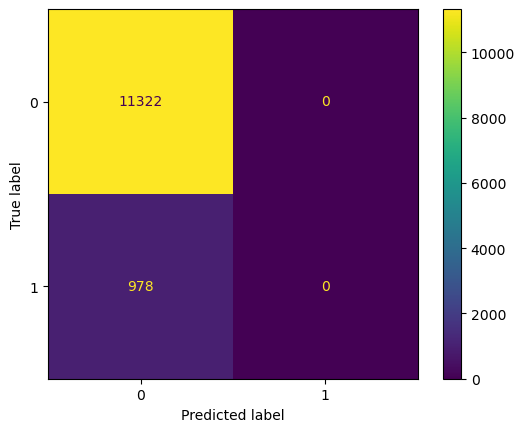

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test,dc_pred)).plot()

In [25]:
#from fonctions import print_score

In [26]:
print_score(y_test, dc_pred)

Accuracy score = 0.9204878048780488
Precision score = 0.0
Recall score = 0.0
F1 score = 0.0
ROC AUC score = 0.5


c:\Users\xavie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4 Autres modèles et pipeline

Pour le pipeline:
- sampler: RandomUnderSampler() (imblearn) 
- transformer: OHE pour cat_feat / log pour feat AMT
- imputer: SimpleImputer('median')
- scaler: StandardScaler()
- estimator = DummyClassifier(), LogReg(), RF(),LightGBM, XGBoost

#### Transformer

In [27]:
log_fct = FunctionTransformer(np.log1p)

In [28]:
transformer= ColumnTransformer(transformers=
                               [
                               ('OneHot',OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_feat),
                               ('num',log_fct,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'])                            
                               ],
                               remainder='passthrough'
                             )
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
                                  'NAME_EDUCATION_TYPE']),
                                ('num',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY'])])

#### Pipeline

In [29]:
pipeline=Pipeline_imb([
    ('sampler',RandomUnderSampler()),
    ('transformer',transformer),
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler()),    
    ('estimator',LogisticRegression())
])
pipeline

Pipeline(steps=[('sampler', RandomUnderSampler()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_INCOME_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_EDUCATION_TYPE']),
                                                 ('num',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'AMT_ANNUITY'])])),
                ('imputer', SimpleImputer()), ('scal

#### Paramgrid

- Avec ou sans scaler
- Avec ou sans sampler (ici RandomUnderSampler() car reste plus de 20000 individus de chaque catégorie (A essayer avec d'autres techniques: SMOTE, oversmapling, class_weight...)
- différents estimateurs: LogisticRegression, RandomForest, XGBoost, LightGBM

In [30]:
param_grid={
    'sampler':[RandomUnderSampler(), 'passthrough'],
    'scaler':[StandardScaler(),'passthrough'],    
    'estimator':[LogisticRegression(),RandomForestClassifier(),LGBMClassifier(),XGBClassifier()]
}

#### GridsearchCV

gridsearch sur 5 folds...

In [31]:
grid= GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=('roc_auc','accuracy','f1','recall','precision'),
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
    refit='roc_auc')

In [32]:
if DISPLAY:
    grid.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [35]:
if DISPLAY:
    res=result(grid, log_target=1)
    res.sort_values(by='mean_test_roc_auc',ascending=False).head(5)
   

In [36]:
RES=pd.DataFrame()

In [37]:
RES=pd.concat([RES, res],axis=0, ignore_index=True)

In [38]:
RES

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_sampler,param_scaler,params,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,mean_train_roc_auc,std_train_roc_auc,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,std_train_accuracy,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_train_precision,std_train_precision,log_target,transf_feat,features
0,0.14,0.03,0.12,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.00,10,0.68,0.00,0.25,0.00,1,0.25,0.00,0.67,0.01,2,0.67,0.00,0.15,0.00,9,0.15,0.00,1,0,
1,0.22,0.02,0.14,0.03,LogisticRegression(),RandomUnderSampler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,4,0.74,0.0,0.68,0.01,9,0.68,0.00,0.25,0.00,2,0.25,0.00,0.66,0.00,4,0.67,0.00,0.15,0.00,10,0.15,0.00,1,0,
2,0.75,0.06,0.14,0.01,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,3,0.74,0.0,0.92,0.00,1,0.92,0.00,0.01,0.00,14,0.01,0.00,0.01,0.00,14,0.01,0.00,0.42,0.07,4,0.41,0.03,1,0,
3,1.54,0.12,0.12,0.01,LogisticRegression(),passthrough,passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,2,0.92,0.00,0.01,0.00,15,0.01,0.00,0.01,0.00,15,0.01,0.00,0.40,0.06,5,0.41,0.02,1,0,
4,2.28,0.26,0.75,0.13,RandomForestClassifier(),RandomUnderSampler(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,10,0.98,0.0,0.67,0.01,12,0.72,0.00,0.24,0.01,4,0.36,0.00,0.66,0.02,6,1.00,0.00,0.15,0.00,11,0.22,0.00,1,0,
5,1.69,0.08,0.65,0.06,RandomForestClassifier(),RandomUnderSampler(),passthrough,"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,9,0.98,0.0,0.67,0.01,11,0.72,0.00,0.24,0.00,5,0.37,0.00,0.65,0.01,7,1.00,0.00,0.15,0.00,12,0.22,0.00,1,0,
6,12.14,0.56,0.75,0.23,RandomForestClassifier(),passthrough,StandardScaler(),"{'estimator': RandomForestClassifier(), 'sampl...",0.71,0.01,16,1.00,0.0,0.92,0.00,3,1.00,0.00,0.01,0.01,16,1.00,0.00,0.01,0.00,15,1.00,0.00,0.40,0.11,6,1.00,0.00,1,0,
7,11.96,1.37,0.83,0.20,RandomForestClassifier(),passthrough,passthrough,"{'estimator': RandomForestClassifier(), 'sampl...",0.71,0.01,14,1.00,0.0,0.92,0.00,4,1.00,0.00,0.02,0.01,13,1.00,0.00,0.01,0.00,13,1.00,0.00,0.42,0.16,3,1.00,0.00,1,0,
8,19.69,0.55,0.18,0.03,LGBMClassifier(),RandomUnderSampler(),StandardScaler(),"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.73,0.01,7,0.83,0.0,0.66,0.00,13,0.69,0.00,0.24,0.01,6,0.30,0.00,0.67,0.01,3,0.82,0.01,0.15,0.00,14,0.18,0.00,1,0,
9,9.35,5.32,0.16,0.04,LGBMClassifier(),RandomUnderSampler(),passthrough,"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.73,0.01,8,0.83,0.0,0.66,0.00,14,0.68,0.01,0.24,0.00,3,0.29,0.00,0.68,0.01,1,0.83,0.01,0.15,0.00,13,0.18,0.00,1,0,


#### Même chose sans log

In [39]:
transformer2=ColumnTransformer(transformers=
                               [
                               ('OneHot',OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_feat),
                               ],
                               remainder='passthrough'
                             )
transformer2

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
                                  'NAME_EDUCATION_TYPE'])])

In [40]:
pipeline2=Pipeline_imb([
    ('sampler',RandomUnderSampler(replacement=True)),
    ('transformer',transformer2),
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler()),
    ('estimator',LogisticRegression())
])
pipeline2

Pipeline(steps=[('sampler', RandomUnderSampler(replacement=True)),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_INCOME_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_EDUCATION_TYPE'])])),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])

In [41]:
grid2= GridSearchCV(
    pipeline2,
    param_grid=param_grid,
    cv=5,
    scoring=('roc_auc','accuracy','f1','recall','precision'),
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
    refit='roc_auc')

In [42]:
if DISPLAY:
    grid2.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [43]:
res=result(grid2, log_target=0)
res.sort_values(by='mean_test_roc_auc',ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_sampler,param_scaler,params,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,mean_train_roc_auc,std_train_roc_auc,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,std_train_accuracy,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_train_precision,std_train_precision,log_target,transf_feat,features
0,0.11,0.01,0.11,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.01,9,0.68,0.00,0.25,0.00,1,0.25,0.00,0.67,0.01,3,0.67,0.00,0.15,0.00,8,0.15,0.00,0,0,
2,0.65,0.02,0.15,0.03,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,2,0.92,0.00,0.01,0.00,13,0.01,0.00,0.01,0.00,13,0.01,0.00,0.44,0.08,2,0.44,0.02,0,0,
9,6.25,1.44,0.13,0.01,LGBMClassifier(),RandomUnderSampler(),passthrough,"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.73,0.00,5,0.83,0.0,0.67,0.00,12,0.69,0.01,0.24,0.00,2,0.30,0.00,0.67,0.01,1,0.82,0.01,0.15,0.00,9,0.18,0.00,0,0,
10,10.00,0.26,0.17,0.03,LGBMClassifier(),passthrough,StandardScaler(),"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.73,0.00,4,0.86,0.0,0.92,0.00,4,0.92,0.00,0.03,0.01,11,0.08,0.00,0.01,0.00,11,0.04,0.00,0.45,0.07,1,0.88,0.01,0,0,
11,17.62,3.63,0.12,0.01,LGBMClassifier(),passthrough,passthrough,"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.73,0.00,3,0.87,0.0,0.92,0.00,6,0.92,0.00,0.03,0.01,12,0.08,0.01,0.01,0.00,12,0.04,0.00,0.42,0.09,4,0.89,0.01,0,0,


In [44]:
RES=pd.concat([RES, res],axis=0, ignore_index=True)
RES

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_sampler,param_scaler,params,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,mean_train_roc_auc,std_train_roc_auc,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,std_train_accuracy,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_train_precision,std_train_precision,log_target,transf_feat,features
0,0.14,0.03,0.12,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.00,10,0.68,0.00,0.25,0.00,1,0.25,0.00,0.67,0.01,2,0.67,0.00,0.15,0.00,9,0.15,0.00,1,0,
1,0.22,0.02,0.14,0.03,LogisticRegression(),RandomUnderSampler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,4,0.74,0.0,0.68,0.01,9,0.68,0.00,0.25,0.00,2,0.25,0.00,0.66,0.00,4,0.67,0.00,0.15,0.00,10,0.15,0.00,1,0,
2,0.75,0.06,0.14,0.01,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,3,0.74,0.0,0.92,0.00,1,0.92,0.00,0.01,0.00,14,0.01,0.00,0.01,0.00,14,0.01,0.00,0.42,0.07,4,0.41,0.03,1,0,
3,1.54,0.12,0.12,0.01,LogisticRegression(),passthrough,passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,2,0.92,0.00,0.01,0.00,15,0.01,0.00,0.01,0.00,15,0.01,0.00,0.40,0.06,5,0.41,0.02,1,0,
4,2.28,0.26,0.75,0.13,RandomForestClassifier(),RandomUnderSampler(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,10,0.98,0.0,0.67,0.01,12,0.72,0.00,0.24,0.01,4,0.36,0.00,0.66,0.02,6,1.00,0.00,0.15,0.00,11,0.22,0.00,1,0,
5,1.69,0.08,0.65,0.06,RandomForestClassifier(),RandomUnderSampler(),passthrough,"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,9,0.98,0.0,0.67,0.01,11,0.72,0.00,0.24,0.00,5,0.37,0.00,0.65,0.01,7,1.00,0.00,0.15,0.00,12,0.22,0.00,1,0,
6,12.14,0.56,0.75,0.23,RandomForestClassifier(),passthrough,StandardScaler(),"{'estimator': RandomForestClassifier(), 'sampl...",0.71,0.01,16,1.00,0.0,0.92,0.00,3,1.00,0.00,0.01,0.01,16,1.00,0.00,0.01,0.00,15,1.00,0.00,0.40,0.11,6,1.00,0.00,1,0,
7,11.96,1.37,0.83,0.20,RandomForestClassifier(),passthrough,passthrough,"{'estimator': RandomForestClassifier(), 'sampl...",0.71,0.01,14,1.00,0.0,0.92,0.00,4,1.00,0.00,0.02,0.01,13,1.00,0.00,0.01,0.00,13,1.00,0.00,0.42,0.16,3,1.00,0.00,1,0,
8,19.69,0.55,0.18,0.03,LGBMClassifier(),RandomUnderSampler(),StandardScaler(),"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.73,0.01,7,0.83,0.0,0.66,0.00,13,0.69,0.00,0.24,0.01,6,0.30,0.00,0.67,0.01,3,0.82,0.01,0.15,0.00,14,0.18,0.00,1,0,
9,9.35,5.32,0.16,0.04,LGBMClassifier(),RandomUnderSampler(),passthrough,"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.73,0.01,8,0.83,0.0,0.66,0.00,14,0.68,0.01,0.24,0.00,3,0.29,0.00,0.68,0.01,1,0.83,0.01,0.15,0.00,13,0.18,0.00,1,0,


In [45]:
grid.best_params_

{'estimator': LogisticRegression(),
 'sampler': RandomUnderSampler(),
 'scaler': StandardScaler()}

#### Remplaçons certaines variables par leur booléen (Income type et Family status)

In [48]:
train_V1.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'FLAG_OWN_CAR',
 'OWN_CAR_AGE',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'client_age',
 'client_prof_exp',
 'Cash_loans',
 'GENDER_FEMALE',
 'active_client',
 'relationship']

In [49]:
X=train_V1.drop(['SK_ID_CURR','TARGET','OWN_CAR_AGE','NAME_HOUSING_TYPE','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'],axis=1)
X.shape

(61498, 16)

In [50]:
y.shape

(61498,)

In [51]:
cat_feat=X.select_dtypes(include=object).columns.to_list()
cat_feat

['NAME_EDUCATION_TYPE']

In [52]:
num_feat

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'client_age',
 'client_prof_exp',
 'Cash_loans',
 'GENDER_FEMALE']

In [53]:
cat_feat=X.select_dtypes(include=object).columns.to_list()
cat_feat

['NAME_EDUCATION_TYPE']

#### avec passage au log (transformer)

In [54]:
transformer= ColumnTransformer(transformers=
                               [
                               ('OneHot',OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_feat),
                               ('num',log_fct,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'])
                               ],
                               remainder='passthrough'
                             )
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_EDUCATION_TYPE']),
                                ('num',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY'])])

In [55]:
pipeline=Pipeline_imb([
    ('sampler',RandomUnderSampler(replacement=True)),
    ('transformer',transformer),
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler()),
    ('estimator',DummyClassifier())
])
pipeline

Pipeline(steps=[('sampler', RandomUnderSampler(replacement=True)),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_EDUCATION_TYPE']),
                                                 ('num',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'AMT_ANNUITY'])])),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('estimator', DummyClassifier())])

In [56]:
grid= GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=('roc_auc','accuracy','f1','recall','precision'),
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
    refit='roc_auc')

In [57]:
if DISPLAY:
    grid.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [58]:
res=result(grid, log_target=1)
res.sort_values(by='mean_test_roc_auc',ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_sampler,param_scaler,params,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,mean_train_roc_auc,std_train_roc_auc,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,std_train_accuracy,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_train_precision,std_train_precision,log_target,transf_feat,features
0,0.06,0.01,0.08,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.00,10,0.68,0.00,0.25,0.00,2,0.25,0.00,0.66,0.01,4,0.66,0.00,0.15,0.00,10,0.15,0.00,1,0,
1,0.28,0.12,0.14,0.08,LogisticRegression(),RandomUnderSampler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,3,0.74,0.0,0.68,0.00,9,0.68,0.00,0.25,0.00,1,0.25,0.00,0.66,0.01,5,0.66,0.00,0.15,0.00,9,0.15,0.00,1,0,
2,0.59,0.20,0.13,0.05,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,3,0.92,0.00,0.01,0.01,14,0.01,0.00,0.01,0.00,14,0.01,0.00,0.39,0.12,7,0.40,0.02,1,0,
3,1.25,0.25,0.07,0.01,LogisticRegression(),passthrough,passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,4,0.74,0.0,0.92,0.00,2,0.92,0.00,0.01,0.01,15,0.01,0.00,0.01,0.00,15,0.01,0.00,0.43,0.12,2,0.42,0.01,1,0,
9,4.36,3.14,0.11,0.02,LGBMClassifier(),RandomUnderSampler(),passthrough,"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.73,0.00,7,0.83,0.0,0.66,0.01,13,0.69,0.01,0.24,0.00,3,0.30,0.00,0.67,0.01,1,0.82,0.01,0.15,0.00,12,0.18,0.00,1,0,
10,7.82,2.81,0.10,0.02,LGBMClassifier(),passthrough,StandardScaler(),"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.73,0.00,6,0.86,0.0,0.92,0.00,1,0.92,0.00,0.03,0.00,11,0.07,0.01,0.02,0.00,11,0.04,0.00,0.49,0.03,1,0.90,0.02,1,0,
11,7.59,2.11,0.10,0.01,LGBMClassifier(),passthrough,passthrough,"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.73,0.00,5,0.86,0.0,0.92,0.00,6,0.92,0.00,0.02,0.01,12,0.08,0.01,0.01,0.00,12,0.04,0.01,0.40,0.07,3,0.90,0.02,1,0,
4,2.11,0.26,0.70,0.17,RandomForestClassifier(),RandomUnderSampler(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,12,0.98,0.0,0.67,0.00,11,0.73,0.00,0.24,0.01,5,0.37,0.00,0.64,0.02,8,1.00,0.00,0.15,0.00,13,0.23,0.00,1,0,
5,1.80,0.05,0.61,0.05,RandomForestClassifier(),RandomUnderSampler(),passthrough,"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,9,0.98,0.0,0.67,0.01,12,0.72,0.01,0.24,0.00,4,0.37,0.00,0.66,0.01,6,1.00,0.00,0.15,0.00,11,0.22,0.00,1,0,
8,10.91,0.58,0.12,0.03,LGBMClassifier(),RandomUnderSampler(),StandardScaler(),"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.72,0.01,8,0.83,0.0,0.66,0.00,14,0.69,0.00,0.24,0.01,6,0.30,0.00,0.67,0.01,2,0.82,0.01,0.15,0.00,14,0.18,0.00,1,0,


In [59]:
RES=pd.concat([RES, res],axis=0, ignore_index=True)

In [60]:
RES.sort_values(by='mean_test_roc_auc',ascending=False).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_sampler,param_scaler,params,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,mean_train_roc_auc,std_train_roc_auc,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,std_train_accuracy,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_train_precision,std_train_precision,log_target,transf_feat,features
0,0.14,0.03,0.12,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.00,10,0.68,0.00,0.25,0.00,1,0.25,0.00,0.67,0.01,2,0.67,0.00,0.15,0.00,9,0.15,0.00,1,0,
2,0.75,0.06,0.14,0.01,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,3,0.74,0.0,0.92,0.00,1,0.92,0.00,0.01,0.00,14,0.01,0.00,0.01,0.00,14,0.01,0.00,0.42,0.07,4,0.41,0.03,1,0,
3,1.54,0.12,0.12,0.01,LogisticRegression(),passthrough,passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,2,0.92,0.00,0.01,0.00,15,0.01,0.00,0.01,0.00,15,0.01,0.00,0.40,0.06,5,0.41,0.02,1,0,
1,0.22,0.02,0.14,0.03,LogisticRegression(),RandomUnderSampler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,4,0.74,0.0,0.68,0.01,9,0.68,0.00,0.25,0.00,2,0.25,0.00,0.66,0.00,4,0.67,0.00,0.15,0.00,10,0.15,0.00,1,0,
32,0.06,0.01,0.08,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.00,10,0.68,0.00,0.25,0.00,2,0.25,0.00,0.66,0.01,4,0.66,0.00,0.15,0.00,10,0.15,0.00,1,0,
33,0.28,0.12,0.14,0.08,LogisticRegression(),RandomUnderSampler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,3,0.74,0.0,0.68,0.00,9,0.68,0.00,0.25,0.00,1,0.25,0.00,0.66,0.01,5,0.66,0.00,0.15,0.00,9,0.15,0.00,1,0,
18,0.65,0.02,0.15,0.03,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,2,0.92,0.00,0.01,0.00,13,0.01,0.00,0.01,0.00,13,0.01,0.00,0.44,0.08,2,0.44,0.02,0,0,
34,0.59,0.20,0.13,0.05,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,3,0.92,0.00,0.01,0.01,14,0.01,0.00,0.01,0.00,14,0.01,0.00,0.39,0.12,7,0.40,0.02,1,0,
16,0.11,0.01,0.11,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.01,9,0.68,0.00,0.25,0.00,1,0.25,0.00,0.67,0.01,3,0.67,0.00,0.15,0.00,8,0.15,0.00,0,0,
11,22.62,4.91,0.14,0.02,LGBMClassifier(),passthrough,passthrough,"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.74,0.00,5,0.86,0.0,0.92,0.00,6,0.92,0.00,0.03,0.01,12,0.08,0.01,0.01,0.00,12,0.04,0.00,0.42,0.10,2,0.89,0.01,1,0,


#### sans passage au log (transformer2)

In [61]:
transformer2=ColumnTransformer(transformers=
                               [
                               ('OneHot',OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_feat),
                               ],
                               remainder='passthrough'
                             )
transformer2

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_EDUCATION_TYPE'])])

In [62]:
pipeline2=Pipeline_imb([
    ('sampler',RandomUnderSampler(replacement=True)),
    ('transformer',transformer2),
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler()),
    ('estimator',DummyClassifier())
])
pipeline2

Pipeline(steps=[('sampler', RandomUnderSampler(replacement=True)),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_EDUCATION_TYPE'])])),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('estimator', DummyClassifier())])

In [63]:
grid2= GridSearchCV(
    pipeline2,
    param_grid=param_grid,
    cv=5,
    scoring=('roc_auc','accuracy','f1','recall','precision'),
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
    refit='roc_auc')

In [64]:
if DISPLAY:
    grid2.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [65]:
res=result(grid2, log_target=0)
res.sort_values(by='mean_test_roc_auc',ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_sampler,param_scaler,params,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,mean_train_roc_auc,std_train_roc_auc,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,std_train_accuracy,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_train_precision,std_train_precision,log_target,transf_feat,features
0,0.07,0.00,0.08,0.02,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.01,9,0.68,0.00,0.25,0.01,1,0.25,0.00,0.66,0.01,4,0.66,0.00,0.15,0.00,8,0.15,0.00,0,0,
2,0.45,0.09,0.09,0.01,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,2,0.92,0.00,0.01,0.01,15,0.01,0.00,0.01,0.00,15,0.01,0.00,0.40,0.10,6,0.42,0.03,0,0,
8,3.42,1.13,0.14,0.03,LGBMClassifier(),RandomUnderSampler(),StandardScaler(),"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.73,0.01,6,0.83,0.0,0.66,0.00,13,0.68,0.00,0.24,0.00,4,0.29,0.00,0.67,0.01,2,0.83,0.01,0.15,0.00,11,0.18,0.00,0,0,
9,9.50,3.70,0.12,0.02,LGBMClassifier(),RandomUnderSampler(),passthrough,"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.73,0.01,5,0.83,0.0,0.66,0.00,12,0.69,0.00,0.24,0.00,2,0.29,0.00,0.68,0.01,1,0.82,0.01,0.15,0.00,10,0.18,0.00,0,0,
10,9.95,2.80,0.09,0.02,LGBMClassifier(),passthrough,StandardScaler(),"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.73,0.00,3,0.86,0.0,0.92,0.00,6,0.92,0.00,0.03,0.01,11,0.07,0.01,0.01,0.01,11,0.04,0.00,0.42,0.12,2,0.90,0.02,0,0,
11,10.27,4.65,0.10,0.02,LGBMClassifier(),passthrough,passthrough,"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.73,0.00,4,0.86,0.0,0.92,0.00,5,0.92,0.00,0.02,0.01,12,0.08,0.01,0.01,0.00,12,0.04,0.00,0.44,0.09,1,0.90,0.01,0,0,
4,2.12,0.13,0.66,0.05,RandomForestClassifier(),RandomUnderSampler(),StandardScaler(),"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,10,0.98,0.0,0.67,0.00,11,0.72,0.01,0.24,0.00,5,0.37,0.01,0.65,0.01,7,1.00,0.00,0.15,0.00,12,0.22,0.00,0,0,
5,1.76,0.14,0.62,0.08,RandomForestClassifier(),RandomUnderSampler(),passthrough,"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,9,0.98,0.0,0.67,0.00,10,0.72,0.01,0.24,0.00,3,0.36,0.00,0.66,0.01,5,1.00,0.00,0.15,0.00,9,0.22,0.00,0,0,
14,11.22,0.18,0.08,0.00,"XGBClassifier(base_score=None, booster=None, c...",passthrough,StandardScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.72,0.00,7,0.91,0.0,0.92,0.00,8,0.93,0.00,0.05,0.01,10,0.23,0.01,0.03,0.00,9,0.13,0.01,0.41,0.06,4,0.96,0.00,0,0,
15,11.06,0.55,0.07,0.01,"XGBClassifier(base_score=None, booster=None, c...",passthrough,passthrough,"{'estimator': XGBClassifier(base_score=None, b...",0.72,0.00,8,0.91,0.0,0.92,0.00,7,0.93,0.00,0.05,0.01,9,0.23,0.01,0.03,0.00,9,0.13,0.01,0.41,0.06,3,0.96,0.00,0,0,


In [66]:
RES=pd.concat([RES, res],axis=0, ignore_index=True)

#### Sans variable catégorielle

In [67]:
train_V1.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'FLAG_OWN_CAR',
 'OWN_CAR_AGE',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'client_age',
 'client_prof_exp',
 'Cash_loans',
 'GENDER_FEMALE',
 'active_client',
 'relationship']

In [68]:
X=train_V1.drop(['SK_ID_CURR','TARGET','OWN_CAR_AGE','NAME_HOUSING_TYPE','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE'],axis=1)
X.shape

(61498, 15)

In [69]:
cat_feat=X.select_dtypes(include=object).columns.to_list()
cat_feat

[]

In [70]:
transformer3= ColumnTransformer(transformers=
                               [
                               ('num',log_fct,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'])
                               ]
                             )
transformer3

ColumnTransformer(transformers=[('num',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY'])])

In [71]:
pipeline3=Pipeline_imb([
    ('sampler',RandomUnderSampler(replacement=True)),
    ('transformer',transformer3),
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler()),
    ('estimator',DummyClassifier())
])
pipeline3

Pipeline(steps=[('sampler', RandomUnderSampler(replacement=True)),
                ('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'AMT_ANNUITY'])])),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('estimator', DummyClassifier())])

In [72]:
param_grid={
    'sampler':[RandomUnderSampler(replacement=True), 'passthrough'],'transformer':[transformer3,'passthrough'],
    'scaler':[StandardScaler(),'passthrough'], 
    'estimator':[LogisticRegression(),RandomForestClassifier(),LGBMClassifier(),XGBClassifier()]
}

In [73]:
grid3= GridSearchCV(
    pipeline3,
    param_grid=param_grid,
    cv=5,
    scoring=('roc_auc','accuracy','f1','recall','precision'),
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
    refit='roc_auc')

In [74]:
if DISPLAY:
    grid3.fit(X,y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [75]:
res=result(grid3, log_target=0)
res.sort_values(by='mean_test_roc_auc',ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_sampler,param_scaler,param_transformer,params,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,mean_train_roc_auc,std_train_roc_auc,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,std_train_accuracy,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_train_precision,std_train_precision,log_target,transf_feat,features
21,4.92,0.57,0.07,0.01,LGBMClassifier(),passthrough,StandardScaler(),passthrough,"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.73,0.00,4,0.86,0.0,0.92,0.00,8,0.92,0.00,0.03,0.01,21,0.08,0.01,0.02,0.00,21,0.04,0.00,0.45,0.06,1,0.89,0.02,0,0,
23,9.13,2.11,0.07,0.01,LGBMClassifier(),passthrough,passthrough,passthrough,"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.73,0.00,3,0.86,0.0,0.92,0.00,10,0.92,0.00,0.03,0.01,22,0.07,0.01,0.01,0.00,22,0.04,0.00,0.44,0.07,2,0.89,0.02,0,0,
1,0.06,0.01,0.05,0.01,LogisticRegression(),RandomUnderSampler(replacement=True),StandardScaler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.73,0.01,1,0.73,0.0,0.68,0.01,17,0.68,0.00,0.24,0.00,1,0.25,0.00,0.65,0.01,6,0.66,0.00,0.15,0.00,8,0.15,0.00,0,0,
5,0.36,0.02,0.07,0.03,LogisticRegression(),passthrough,StandardScaler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.73,0.01,2,0.73,0.0,0.92,0.00,9,0.92,0.00,0.01,0.00,25,0.01,0.00,0.01,0.00,25,0.01,0.00,0.39,0.10,4,0.40,0.02,0,0,
19,3.85,0.47,0.08,0.02,LGBMClassifier(),RandomUnderSampler(replacement=True),passthrough,passthrough,"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.72,0.01,6,0.82,0.0,0.66,0.01,20,0.68,0.00,0.24,0.00,3,0.29,0.00,0.66,0.01,2,0.82,0.00,0.14,0.00,12,0.18,0.00,0,0,
17,2.72,0.26,0.10,0.01,LGBMClassifier(),RandomUnderSampler(replacement=True),StandardScaler(),passthrough,"{'estimator': LGBMClassifier(), 'sampler': Ran...",0.72,0.00,5,0.82,0.0,0.66,0.00,19,0.68,0.01,0.24,0.00,2,0.29,0.00,0.66,0.01,1,0.82,0.01,0.14,0.00,10,0.18,0.00,0,0,
31,9.42,0.29,0.05,0.00,"XGBClassifier(base_score=None, booster=None, c...",passthrough,passthrough,passthrough,"{'estimator': XGBClassifier(base_score=None, b...",0.72,0.00,8,0.91,0.0,0.92,0.00,13,0.93,0.00,0.05,0.01,17,0.23,0.02,0.03,0.01,19,0.13,0.01,0.37,0.08,5,0.96,0.01,0,0,
29,10.04,0.63,0.07,0.01,"XGBClassifier(base_score=None, booster=None, c...",passthrough,StandardScaler(),passthrough,"{'estimator': XGBClassifier(base_score=None, b...",0.72,0.00,7,0.91,0.0,0.92,0.00,14,0.93,0.00,0.05,0.01,18,0.23,0.02,0.03,0.01,19,0.13,0.01,0.37,0.08,6,0.96,0.01,0,0,
11,1.53,0.07,0.58,0.04,RandomForestClassifier(),RandomUnderSampler(replacement=True),passthrough,passthrough,"{'estimator': RandomForestClassifier(), 'sampl...",0.72,0.01,9,0.98,0.0,0.66,0.01,18,0.72,0.00,0.24,0.00,4,0.36,0.00,0.65,0.01,7,1.00,0.00,0.14,0.00,11,0.22,0.00,0,0,
9,1.92,0.18,0.65,0.06,RandomForestClassifier(),RandomUnderSampler(replacement=True),StandardScaler(),passthrough,"{'estimator': RandomForestClassifier(), 'sampl...",0.71,0.01,10,0.98,0.0,0.66,0.01,21,0.71,0.01,0.24,0.00,5,0.36,0.00,0.66,0.02,5,1.00,0.00,0.14,0.00,13,0.22,0.00,0,0,


In [76]:
RES=pd.concat([RES, res],axis=0, ignore_index=True)

In [77]:
RES.sort_values(by='mean_test_roc_auc',ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_sampler,param_scaler,params,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,mean_train_roc_auc,std_train_roc_auc,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,std_train_accuracy,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_train_precision,std_train_precision,log_target,transf_feat,features,param_transformer
0,0.14,0.03,0.12,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.00,10,0.68,0.0,0.25,0.00,1,0.25,0.00,0.67,0.01,2,0.67,0.0,0.15,0.00,9,0.15,0.00,1,0,,NaN
11,22.62,4.91,0.14,0.02,LGBMClassifier(),passthrough,passthrough,"{'estimator': LGBMClassifier(), 'sampler': 'pa...",0.74,0.00,5,0.86,0.0,0.92,0.00,6,0.92,0.0,0.03,0.01,12,0.08,0.01,0.01,0.00,12,0.04,0.0,0.42,0.10,2,0.89,0.01,1,0,,NaN
50,0.45,0.09,0.09,0.01,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,2,0.92,0.0,0.01,0.01,15,0.01,0.00,0.01,0.00,15,0.01,0.0,0.40,0.10,6,0.42,0.03,0,0,,NaN
1,0.22,0.02,0.14,0.03,LogisticRegression(),RandomUnderSampler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,4,0.74,0.0,0.68,0.01,9,0.68,0.0,0.25,0.00,2,0.25,0.00,0.66,0.00,4,0.67,0.0,0.15,0.00,10,0.15,0.00,1,0,,NaN
35,1.25,0.25,0.07,0.01,LogisticRegression(),passthrough,passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,4,0.74,0.0,0.92,0.00,2,0.92,0.0,0.01,0.01,15,0.01,0.00,0.01,0.00,15,0.01,0.0,0.43,0.12,2,0.42,0.01,1,0,,NaN
34,0.59,0.20,0.13,0.05,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,3,0.92,0.0,0.01,0.01,14,0.01,0.00,0.01,0.00,14,0.01,0.0,0.39,0.12,7,0.40,0.02,1,0,,NaN
33,0.28,0.12,0.14,0.08,LogisticRegression(),RandomUnderSampler(),passthrough,"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,3,0.74,0.0,0.68,0.00,9,0.68,0.0,0.25,0.00,1,0.25,0.00,0.66,0.01,5,0.66,0.0,0.15,0.00,9,0.15,0.00,1,0,,NaN
32,0.06,0.01,0.08,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.00,10,0.68,0.0,0.25,0.00,2,0.25,0.00,0.66,0.01,4,0.66,0.0,0.15,0.00,10,0.15,0.00,1,0,,NaN
18,0.65,0.02,0.15,0.03,LogisticRegression(),passthrough,StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,2,0.74,0.0,0.92,0.00,2,0.92,0.0,0.01,0.00,13,0.01,0.00,0.01,0.00,13,0.01,0.0,0.44,0.08,2,0.44,0.02,0,0,,NaN
16,0.11,0.01,0.11,0.01,LogisticRegression(),RandomUnderSampler(),StandardScaler(),"{'estimator': LogisticRegression(), 'sampler':...",0.74,0.01,1,0.74,0.0,0.68,0.01,9,0.68,0.0,0.25,0.00,1,0.25,0.00,0.67,0.01,3,0.67,0.0,0.15,0.00,8,0.15,0.00,0,0,,NaN


In [78]:
RES.to_csv('C:/Users/xavie/P7/RES.csv', index =False)

In [79]:
grid3.best_estimator_

Pipeline(steps=[('sampler', RandomUnderSampler(replacement=True)),
                ('transformer', 'passthrough'), ('imputer', SimpleImputer()),
                ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])

In [80]:
grid3.best_params_

{'estimator': LogisticRegression(),
 'sampler': RandomUnderSampler(replacement=True),
 'scaler': StandardScaler(),
 'transformer': 'passthrough'}

### Conclusion
- résultats meilleurs sans var catégorielles (ie sans passage par OHE) => à revérifier suite à ajout de reamainder = 'passthrough'
- avec scaler
- sans passage au log
- avec sampler (ie avec equilibrage des classes)

=> Partir sur ces bases pour amélioratiosn des hyperparamètres

Essai avec KNNImputer

In [81]:
#pipeline4=Pipeline_imb([
#    ('sampler',RandomUnderSampler(replacement=True)),
#    ('transformer',transformer3),
#    ('imputer',KNNImputer()),
#    ('scaler',StandardScaler()),
#    ('estimator',DummyClassifier())
#])
#pipeline4

In [82]:
#param_grid={
#    'sampler':[RandomUnderSampler(replacement=True), 'passthrough'],
#    'transformer':[transformer3,'passthrough'],
#    'scaler':[StandardScaler(),'passthrough'], 
#    'estimator':[LogisticRegression(),LGBMClassifier(),]
#}

In [83]:
#grid4= GridSearchCV(
#    pipeline4,
#    param_grid=param_grid,
#    cv=5,
#    scoring=('roc_auc','accuracy','f1','recall','precision'),
#    n_jobs=-1,
#    verbose=2,
#    return_train_score=True,
#    refit='roc_auc')

In [84]:
#grid4.fit(X,y)

#### Représentation graphique du meilleur modèle (y_pred vs y_true / matrice de confusion)

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [86]:
print('Train set:',X_train.shape)
print('Test set:',X_test.shape)
print('Train target:',y_train.shape)
print('Test target:',y_test.shape)

Train set: (49198, 15)
Test set: (12300, 15)
Train target: (49198,)
Test target: (12300,)


#### Best model en V1 = LogReg (bcp + rapide)

In [87]:
best_model=Pipeline_imb([
    ('sampler',RandomUnderSampler()),
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('estimator',LogisticRegression())
])
best_model

Pipeline(steps=[('sampler', RandomUnderSampler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])

In [88]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('sampler', RandomUnderSampler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])

In [89]:
lr_predict=best_model.predict(X_test)

In [90]:
print_score(y_test, lr_predict)

Accuracy score = 0.6804065040650407
Precision score = 0.15458148752622988
Recall score = 0.6849173553719008
F1 score = 0.252235115084649
ROC AUC score = 0.6824692671670658


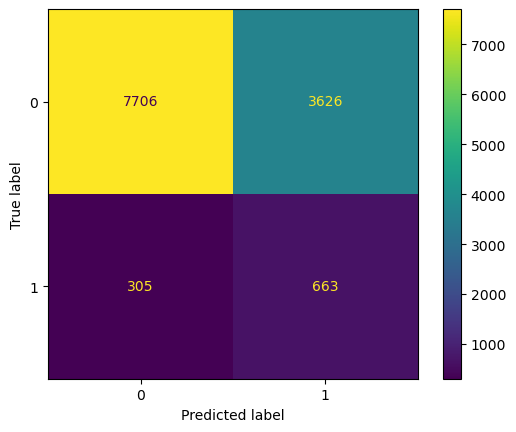

In [91]:
ConfusionMatrixDisplay(confusion_matrix(y_test,lr_predict)).plot()

#### A creuser: AUC ROC = 0.50+ (sans sampler) . Bien loin du résultat de grid3...

AUC ROC = 0.68 avec resampling (LGBM) - 0.65 avec LR suite à revue du code (ajout handle unknown et resampling en début de pipeline)

# 5 Feature importance

## Si best.model = LGBM

In [92]:
#best_model.steps

In [93]:
#best_model.steps[3][1].feature_importances_

features_importances_ fonctionne avec LGBM mais pas avec LogReg

In [94]:
#plot_importance(best_model.steps[3][1])

In [95]:
#best_model.get_feature_names_out

In [96]:
#best_model[-1].feature_name_

A ce stade je ne sais pas comment récupérer lmes noms des features donc graphe difficilement lisible

In [97]:
feat=X_train.columns.to_list()
feat

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'client_age',
 'client_prof_exp',
 'Cash_loans',
 'GENDER_FEMALE',
 'active_client',
 'relationship']

#### Reconstruction du dataframe pour affichage des features

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [99]:
best_model.steps

[('sampler', RandomUnderSampler()),
 ('imputer', SimpleImputer(strategy='median')),
 ('scaler', StandardScaler()),
 ('estimator', LogisticRegression())]

In [100]:
IMP=SimpleImputer(strategy='median')

In [101]:
SCA=StandardScaler()

In [102]:
X_train

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship
174060,0,1,112500.0,90000.0,9450.0,3.0,0.113691,0.642812,0.456110,25,3.0,1,1,1,0
209231,0,1,315000.0,1125000.0,33025.5,1.0,NaN,0.493398,0.659406,54,-0.0,1,1,0,0
215329,0,0,180000.0,755190.0,32125.5,2.0,NaN,0.104850,0.553165,35,16.0,1,1,1,1
162171,0,1,180000.0,592560.0,35937.0,2.0,NaN,0.511978,0.488455,27,1.0,1,0,1,1
94659,0,1,225000.0,1129500.0,31189.5,4.0,0.902504,0.601885,0.694093,49,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220707,0,1,180000.0,1327500.0,41814.0,2.0,0.625291,0.735883,0.819318,42,9.0,1,1,1,1
83916,0,1,90000.0,808650.0,26217.0,2.0,NaN,0.665124,0.809508,56,8.0,1,1,1,1
107875,1,0,157500.0,450000.0,22018.5,2.0,NaN,0.683792,0.429424,36,3.0,1,1,1,1
139327,0,0,117000.0,388512.0,25249.5,1.0,NaN,0.219340,0.831778,67,-0.0,1,1,0,0


In [103]:
A=IMP.fit_transform(X_train)
A=SCA.fit_transform(A)
A=pd.DataFrame(A, columns=X_train.columns)
A.shape

(49198, 15)

In [104]:
X_train.shape

(49198, 15)

In [105]:
y_train.shape

(49198,)

#### Sampling manuel

In [106]:
X_train_rus, y_train_rus=RandomUnderSampler().fit_resample(A,y_train)

In [107]:
X_train_rus.shape

(7996, 15)

In [108]:
y_train_rus.shape

(7996,)

#### Je 'fit' l'estimateur sur les X-train et y_train 'samplés'

In [109]:
EST=LGBMClassifier()
EST

LGBMClassifier()

In [110]:
EST.fit(X_train_rus, y_train_rus)

[LightGBM] [Info] Number of positive: 3998, number of negative: 3998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1516
[LightGBM] [Info] Number of data points in the train set: 7996, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

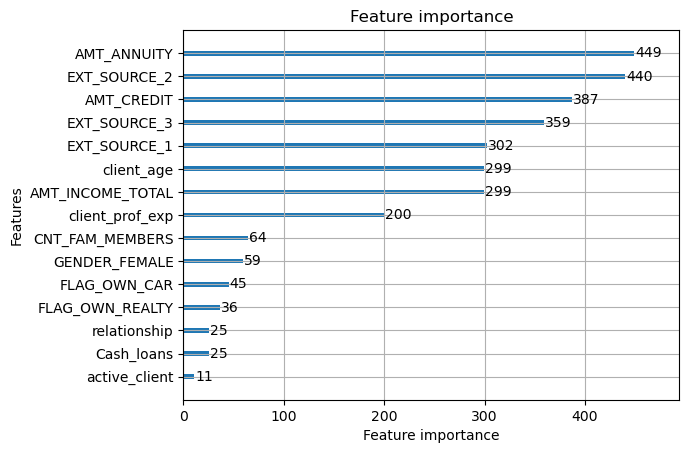

In [111]:
plot_importance(EST)

Je scale X_test...

In [112]:
X_test_sca=IMP.fit_transform(X_test)
X_test_sca=SCA.fit_transform(X_test_sca)
X_test_sca=pd.DataFrame(X_test_sca, columns=X_test.columns)
X_test_sca.shape

(12300, 15)

In [113]:
y_pred=EST.predict(X_test_sca)

In [114]:
y_test.shape

(12300,)

In [115]:
y_pred.shape

(12300,)

In [116]:
print_score(y_test, y_pred)

Accuracy score = 0.6954471544715447
Precision score = 0.14271255060728744
Recall score = 0.6117136659436009
F1 score = 0.23143208863356585
ROC AUC score = 0.6569730221087313


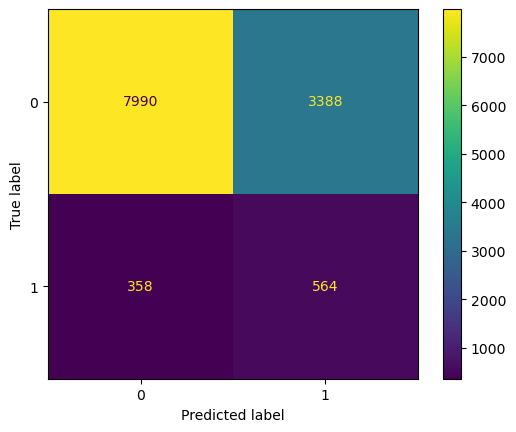

In [117]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

Avec importance_type = gain

In [118]:
EST=LGBMClassifier(importance_type='gain')

In [119]:
EST.fit(X_train_rus, y_train_rus)

[LightGBM] [Info] Number of positive: 3998, number of negative: 3998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1516
[LightGBM] [Info] Number of data points in the train set: 7996, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(importance_type='gain')

In [120]:
EST.importance_type

'gain'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

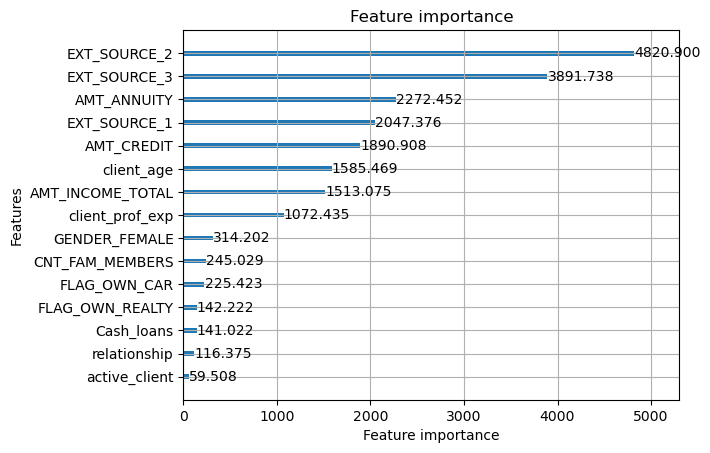

In [121]:
plot_importance(EST)

In [122]:
y_pred=EST.predict(X_test_sca)

In [123]:
print_score(y_test, y_pred)

Accuracy score = 0.6954471544715447
Precision score = 0.14271255060728744
Recall score = 0.6117136659436009
F1 score = 0.23143208863356585
ROC AUC score = 0.6569730221087313


## Si best.model = LogReg

- Essai avec bout de code trouvé sur le net

In [124]:
best_model.steps

[('sampler', RandomUnderSampler()),
 ('imputer', SimpleImputer(strategy='median')),
 ('scaler', StandardScaler()),
 ('estimator', LogisticRegression())]

In [125]:
feat_importance=abs(best_model.steps[3][1].coef_[0])
feat_importance = 100.0 * (feat_importance / feat_importance.max())

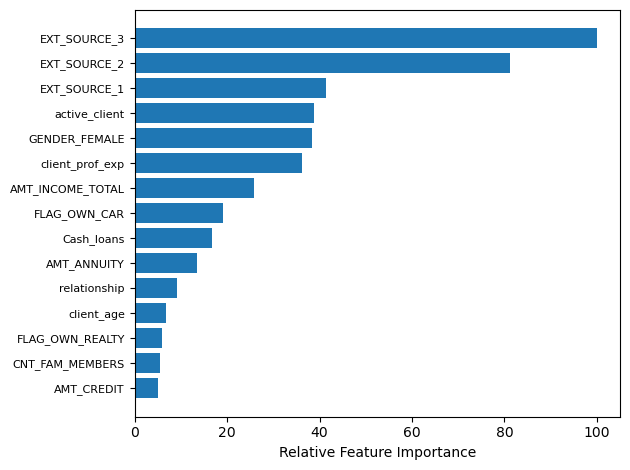

In [126]:
sorted_idx = np.argsort(feat_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feat_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## 5.3 SHAP

### 5.3.1 Init

In [127]:
#np.version.version

In [128]:
import shap

In [129]:
shap.initjs()

### 5.3.1 Reconstitution du modèle 
- df à entrainer: X_train_rus
- EST = LogReg()

In [130]:
X_train_rus

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship
7988,-0.719486,-1.496133,0.343020,0.750029,0.937248,-0.173312,-0.117640,-0.217885,-1.333310,0.971399,-0.064653,0.326523,-1.390321,0.465368,0.597431
3244,1.389881,0.668390,-0.335212,0.981045,0.849151,0.924629,-2.389003,0.642830,0.310002,-0.117394,-0.378481,0.326523,-1.390321,0.465368,0.597431
2831,-0.719486,0.668390,-0.877797,-1.148578,-0.941759,-0.173312,0.857570,1.073179,1.233556,-0.033641,0.719917,0.326523,0.719259,0.465368,0.597431
35095,1.389881,0.668390,0.569098,-0.248862,0.428992,-1.271254,-0.151273,0.594845,-0.575462,-0.033641,0.876831,0.326523,0.719259,0.465368,-1.673833
30333,1.389881,-1.496133,-0.425643,-0.810883,-0.536078,-0.173312,0.017240,-1.320391,0.114991,-0.536160,0.092261,0.326523,-1.390321,0.465368,0.597431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49176,-0.719486,0.668390,-0.109134,1.522003,0.568224,-0.173312,0.017240,-2.431599,0.114991,-1.373694,-0.692309,0.326523,0.719259,0.465368,0.597431
49178,-0.719486,-1.496133,-0.561289,-0.189893,0.088923,0.924629,-1.967256,0.301512,0.114991,-1.289940,-0.535395,0.326523,0.719259,0.465368,0.597431
49181,-0.719486,-1.496133,-0.335212,-0.299789,0.141905,-0.173312,0.017240,0.120816,-0.092291,-0.452407,1.661400,0.326523,0.719259,0.465368,-1.673833
49182,1.389881,-1.496133,0.116943,0.191615,0.110793,0.924629,0.017240,-1.387481,-2.526418,-0.619914,1.818314,0.326523,0.719259,0.465368,0.597431


In [131]:
y_train_rus.shape

(7996,)

In [132]:
EST=LogisticRegression()
EST

LogisticRegression()

### 5.3.2 Summary plot

In [133]:
EST.fit(X_train_rus,y_train_rus)

LogisticRegression()

In [134]:
explainer=shap.LinearExplainer(EST,X_train_rus)
explainer

In [135]:
shap_values=explainer(X_train_rus)

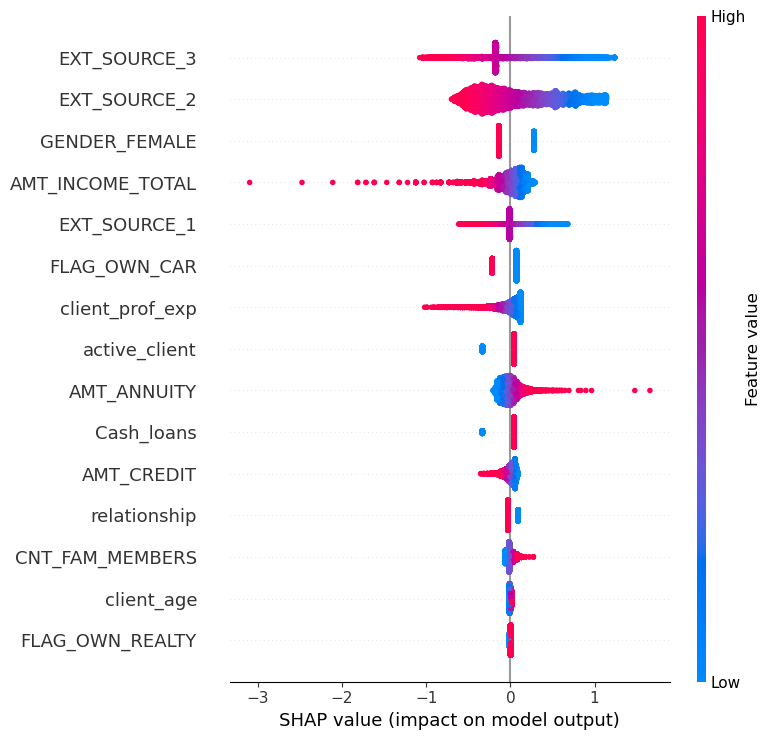

In [136]:
shap.summary_plot(shap_values)

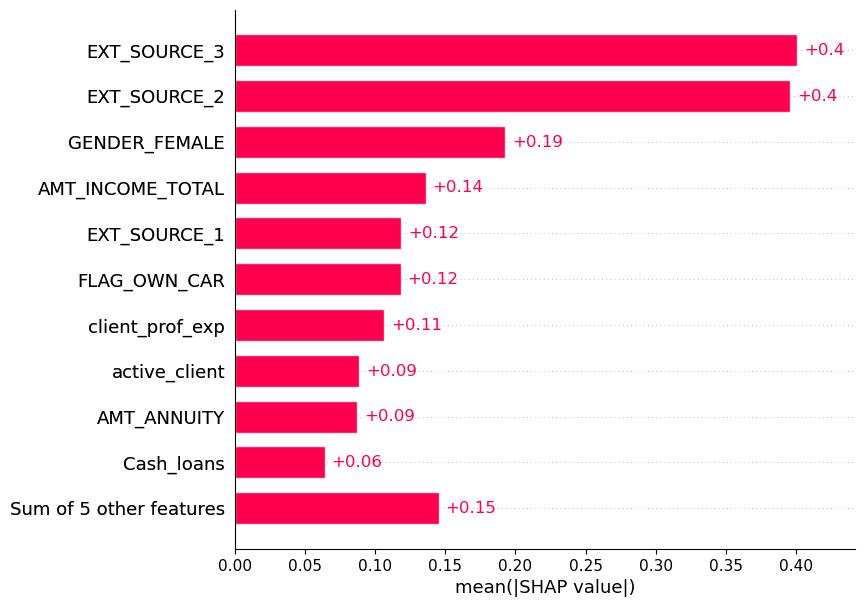

In [137]:
shap.plots.bar(shap_values, max_display= 11)

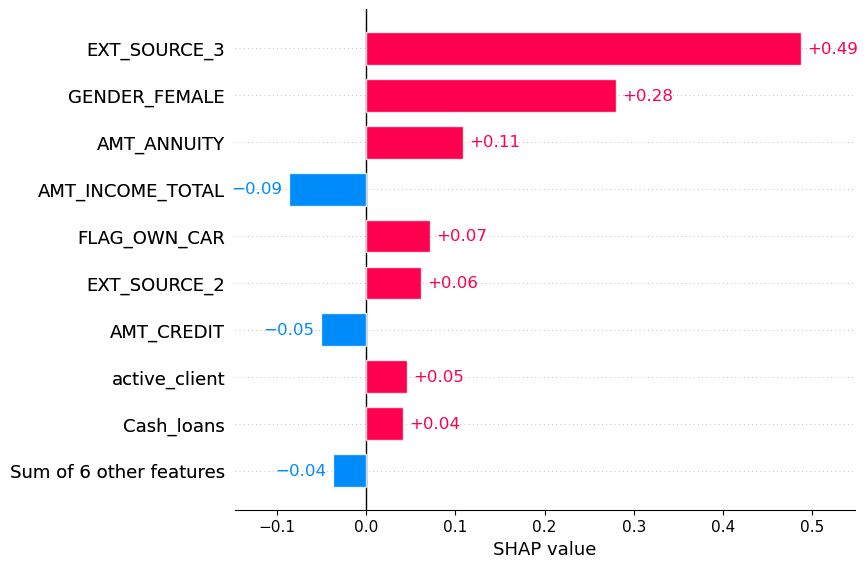

In [138]:
shap.plots.bar(shap_values[0])

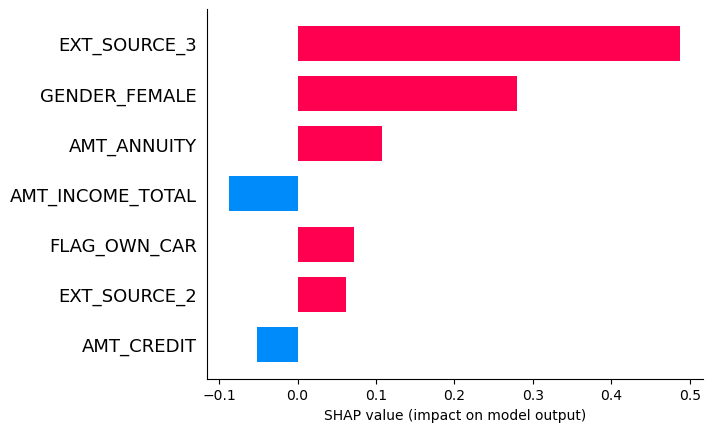

In [139]:
shap.bar_plot(explainer.shap_values(X_train_rus.iloc[0]),
              feature_names=feat,)

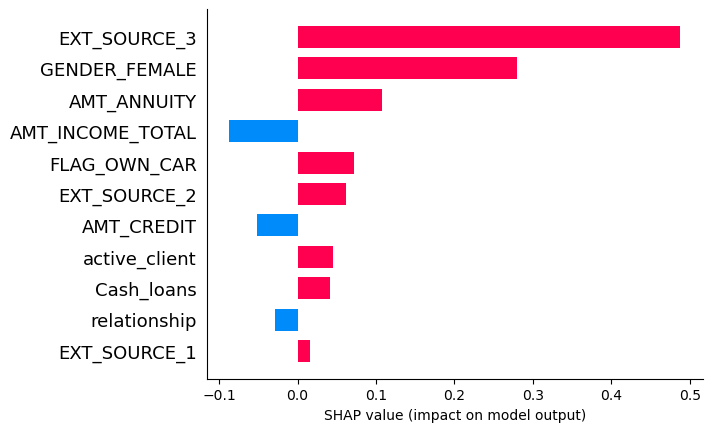

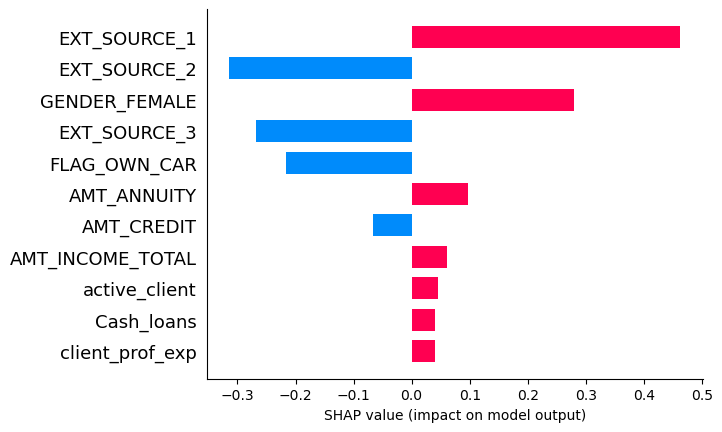

In [140]:
shap.bar_plot(explainer.shap_values(X_train_rus)[0], feature_names=feat, max_display=11)
shap.bar_plot(explainer.shap_values(X_train_rus)[1], feature_names=feat, max_display=11)


In [141]:
X_train_rus.describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,-0.040722,-0.005114,-0.034041,-0.026716,-0.008349,0.033753,-0.156474,-0.239700,-0.236812,-0.129419,-0.073170,0.056108,-0.095710,0.068465,-0.014696
std,0.985476,1.002164,0.904363,0.962556,0.965757,1.039577,1.034119,1.089488,1.067723,0.990078,0.908429,0.918392,1.027229,0.938171,1.007834
min,-0.719486,-1.496133,-1.411339,-1.371944,-1.720160,-1.271254,-3.511010,-2.690471,-2.963654,-1.876213,-0.849223,-3.062568,-1.390321,-2.148835,-1.673833
25%,-0.719486,-1.496133,-0.561289,-0.797950,-0.700568,-0.173312,0.002225,-1.077539,-0.966541,-0.954927,-0.692309,0.326523,-1.390321,0.465368,-1.673833
50%,-0.719486,0.668390,-0.289996,-0.221622,-0.130859,-0.173312,0.017240,0.043628,0.114991,-0.201147,-0.378481,0.326523,0.719259,0.465368,0.597431
75%,1.389881,0.668390,0.343020,0.512815,0.486826,0.924629,0.017240,0.653976,0.411277,0.636386,0.249175,0.326523,0.719259,0.465368,0.597431
max,1.389881,0.668390,14.133735,5.206173,13.899315,6.414336,3.090644,1.527381,2.069945,2.060192,5.898077,0.326523,0.719259,0.465368,0.597431


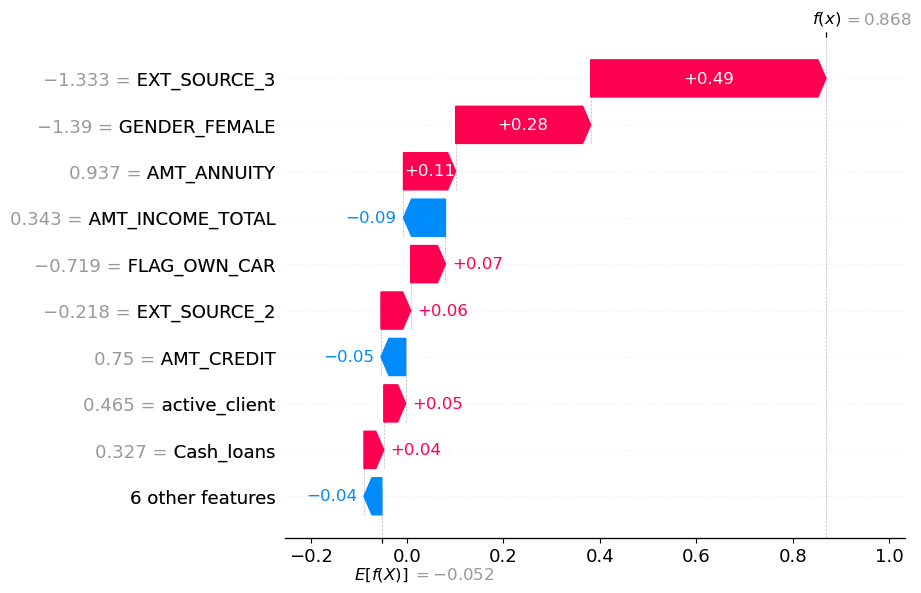

In [142]:
#shap_values.feature_names = feat.tolist()
shap.waterfall_plot(shap_values[0])#, max_display=len(feat))

In [143]:
ev=explainer.expected_value
ev

-0.05213298102521341

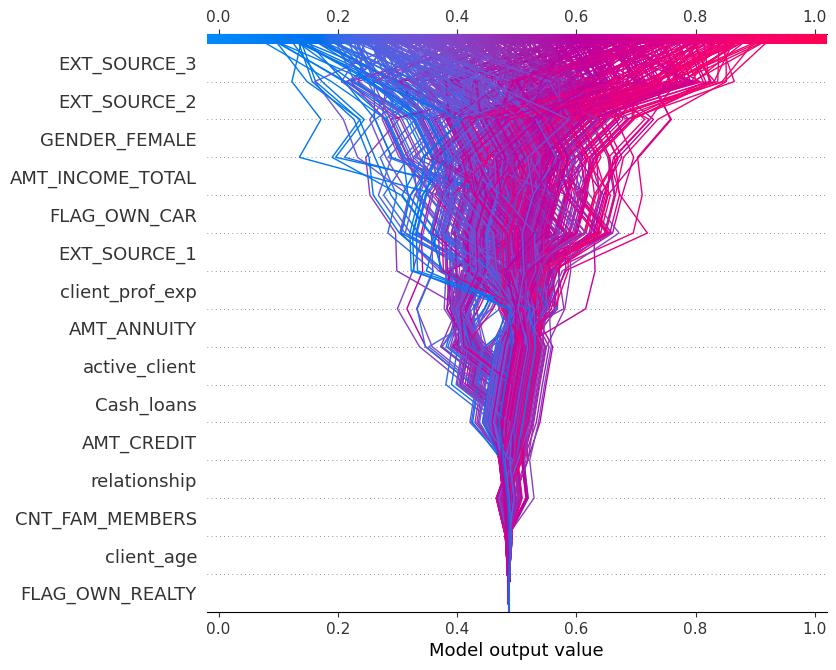

In [144]:
shap.decision_plot(ev,explainer.shap_values(X_train_rus.sample(500)), feat, link="logit",) #features_display

In [145]:
shap.force_plot(explainer.expected_value,
                explainer.shap_values(X_train_rus.iloc[0]),
                feature_names=feat)#,out_names="XXXX")

## 5.4 Essai yellowbrick

In [146]:
from yellowbrick.classifier import DiscriminationThreshold

In [147]:
model= LogisticRegression()
visualizer=DiscriminationThreshold(model)


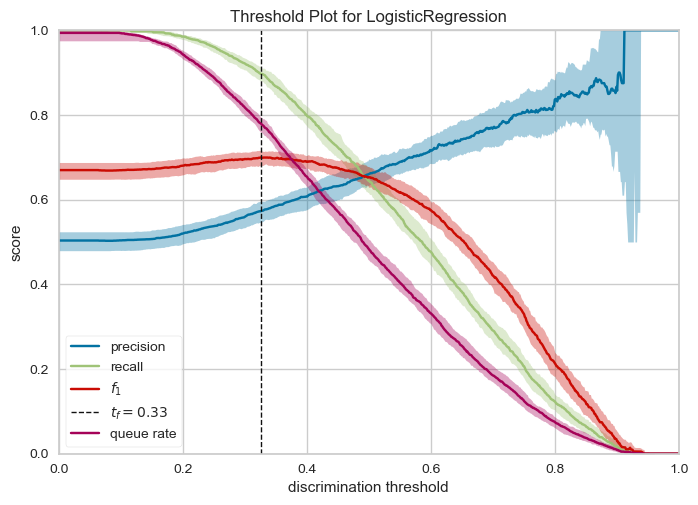

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [148]:
visualizer.fit(X_train_rus,y_train_rus)
visualizer.show()

# 6 Def d'une fonction 'gain' pour estimer l'argent gagné

## 6.1 Fonction permettant d'estimer le différentiel entre prédictions et réalité

### Règles de calcul:
- Si y-pred = y_true = 0 => gain= interêts perçus sur le crédit = M * i * n
    
    M= Montant du crédit ;    
    i = taux d'interêt ;    
    n = nb d'année;
        
    Mais pas de gain par rapport à la situation sans modèle de prédiction
    

- Si y-pred = y_true = 1 => Si on considère que le prêt a été accordé à tort dans la réalité et que grace à notre modèle on n'octroie pas le crédit, le gain est une perte évitée soit:

    Montant du crédit moins revente du produit financé (moisn décôte de 30%) => M-(30% * PP)

- Si y_pred =1 et y_true= 0 => Faux négatif: montant non accordé à tort: Manque à gagner (perte) = M * i * n

- SI y_pred = 0 et y_true =1 => Faux positif: montant accordé à tort: Perte = Montant du crédit - revente du bien acheté (avec décote de 30% par ex) => M-(30% * PP)

Rappel:  les NaN sur AMNT_GOODS_PRICE ont été défaulté avec le montant du crédit associé

### J'ai besoin de AMT_GOODS_PRICE pour le calcul de la fonction gain mais pas pour fit du LGBM. 
Pb lors fit du best_model (pipeline) => comme pour calcul de la feature importance je fais tourner le modèle manuellement.

essai avec drop dans ColumnsTransformer??


In [149]:
train_V1.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship
98632,214531,0,1,6.0,1,House / apartment,225000.0,590337.0,28530.0,477000.0,Working,Civil marriage,Higher education,4.0,0.421998,0.468113,0.572683,41,15.0,1,1,1,1
11928,113904,0,0,NaN,0,House / apartment,135000.0,677664.0,36760.5,585000.0,Working,Single / not married,Secondary / secondary special,1.0,NaN,0.484962,0.656158,41,12.0,1,0,1,0
53122,161529,0,1,9.0,1,House / apartment,101250.0,540000.0,25978.5,540000.0,State servant,Married,Higher education,4.0,0.269745,0.063719,NaN,26,0.0,1,0,1,1
177570,305788,0,0,NaN,0,House / apartment,180000.0,598500.0,15916.5,598500.0,Commercial associate,Married,Secondary / secondary special,2.0,NaN,0.504359,0.328063,50,8.0,1,1,1,1
305341,453791,0,0,NaN,1,House / apartment,60750.0,202500.0,10125.0,202500.0,Pensioner,Married,Higher education,2.0,0.666185,0.315833,0.657784,56,-0.0,0,1,0,1


Dans X_tmp, j'inclus AMT_GOODS_PRICE

In [150]:
X_tmp=train_V1.drop(['TARGET','OWN_CAR_AGE','NAME_HOUSING_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE'],axis=1)
X_tmp.shape

(61498, 17)

In [151]:
y.shape

(61498,)

Train test split sur base X_tmp

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X_tmp,y,test_size=0.2)

In [153]:
print('Train set:',X_train.shape)
print('Test set:',X_test.shape)
print('Train target:',y_train.shape)
print('Test target:',y_test.shape)

Train set: (49198, 17)
Test set: (12300, 17)
Train target: (49198,)
Test target: (12300,)


In [154]:
#X_train.head()

In [155]:
#y_train.head()

In [156]:
#X_test.head()

In [157]:
#y_test.head()

### Décomposition de best_model

In [158]:
best_model

Pipeline(steps=[('sampler', RandomUnderSampler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])

In [159]:
def decomposition_modele(modele, X_train=X_train,X_test=X_test,y_train=y_train,):
    '''
    Fonction permettant de décomposer un modèle (pipeline) imbalanced avec d'un côté le preprocessing et d'un autre côté l'estimateur
    Le but étant de pouvoir gérer la feature importance en conservant le nom des colonnes de X_train
    
    Arguments:
    - modele: de type pipeline
    - X_train
    - X_test
    - y_train (necessaire pour le resampling)
    '''
        
    # Si modèle imbalanced:
    
    if str(best_model[0]) == 'RandomUnderSampler()':
        
        #Sampling
        
        X_tr, y_train_rus=best_model[0].fit_resample(X_train,y_train)
    
        # Preprocessing X_train
    
        X_tr=best_model[1:-1].fit_transform(X_tr)
        X_tr_transf=pd.DataFrame(X_tr, columns=X_train.columns)
    
        # Preprocessing X_test
    
        X_te_transf=best_model[1:-1].fit_transform(X_test)
        X_te_transf=pd.DataFrame(X_te_transf, columns=X_train.columns)
        
    else: # si classes équilibrées
        
        y_train_rus = y_train
        X_tr=best_model[:-1].fit_transform(X_train)
        X_tr_transf=pd.DataFrame(X_tr, columns=X_train.columns)
    
        # Preprocessing y_train
    
        X_te_transf=best_model[:-1].fit_transform(X_test)
        X_te_transf=pd.DataFrame(X_te_transf, columns=X_train.columns)
    
       
    return X_tr_transf,X_te_transf, y_train_rus

Decomposition du modèle avec fonction créée

In [160]:
best_model[0]

RandomUnderSampler()

In [161]:
X_train_rus,X_test_sca,y_train_rus=decomposition_modele(best_model)

In [162]:
X_train_rus.shape

(7860, 17)

In [163]:
y_train_rus.shape

(7860,)

In [164]:
X_test_sca.shape

(12300, 17)

#### Sampling manuel

In [165]:
#X_train_rus, y_train_rus=RandomUnderSampler().fit_resample(X_train,y_train)

In [166]:
#X_train_rus.shape

In [167]:
#X_train_rus.head()

In [168]:
#y_train_rus.shape

In [169]:
#y_train_rus.head()

Imputation Nan et scaling de X_train_rus

In [170]:
#IMP=SimpleImputer(strategy='median')

In [171]:
#SCA=StandardScaler()

In [172]:
#A=IMP.fit_transform(X_train_rus)
#A=SCA.fit_transform(A)
#A=pd.DataFrame(A, columns=X_train_rus.columns)
#A.shape

In [173]:
#A.head()

Même chose (sauf sampling) sur X_test

In [174]:
#B=IMP.fit_transform(X_test)
#B=SCA.fit_transform(B)
#B=pd.DataFrame(B, columns=X_test.columns)
#B.shape

In [175]:
#B.head()

#### Avant entrainement du modèle, je retire la feat AMT_GOODS_PRICE
- sur X_train-rus 
- sur X_test scalé

In [176]:
X_train_rus=X_train_rus.drop(['AMT_GOODS_PRICE'],axis=1)
X_train_rus

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship
0,0.757737,-0.689968,0.680546,-0.562943,-0.929036,-0.359105,-0.186514,1.027522,0.753992,1.076914,0.089343,0.341114,0.296461,0.782078,0.422805,0.608517
1,1.495311,-0.689968,0.680546,-0.219730,-0.346579,-0.523800,-1.252698,-0.016300,0.257314,0.048901,1.015661,-0.339339,0.296461,0.782078,0.422805,-1.643340
2,-1.721495,1.449342,0.680546,-0.562943,-0.272040,-0.627906,1.945853,-0.757039,0.694629,1.407547,-0.500132,1.872131,0.296461,0.782078,0.422805,0.608517
3,-0.729235,-0.689968,0.680546,0.417666,-0.953882,-1.020562,1.945853,-0.247384,-0.157369,0.048901,-1.594872,-0.679565,0.296461,0.782078,0.422805,0.608517
4,-1.443535,1.449342,0.680546,0.417666,2.167256,1.036785,0.879669,0.810780,1.330947,-0.975911,0.089343,1.021566,0.296461,0.782078,0.422805,0.608517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,1.644427,-0.689968,0.680546,-0.710035,-1.048490,-1.320160,0.879669,-1.564645,-0.262899,1.607156,-0.163290,1.872131,-3.373122,-1.278644,0.422805,0.608517
7856,0.025412,-0.689968,0.680546,-0.415852,-0.749855,-0.799630,-1.252698,-0.016300,-0.272266,-1.467858,1.436714,-0.849678,0.296461,0.782078,-2.365155,-1.643340
7857,-0.781544,1.449342,0.680546,0.270574,-1.347124,-1.384096,-1.252698,-0.016300,-2.269986,-2.031210,-0.500132,-0.339339,0.296461,-1.278644,0.422805,-1.643340
7858,-1.089834,-0.689968,-1.469409,-0.562943,-0.079480,-0.017664,-0.186514,-0.339508,-0.563571,0.048901,-1.173818,0.681340,0.296461,0.782078,0.422805,-1.643340


In [177]:
X_test_sca=X_test_sca.drop(['AMT_GOODS_PRICE'],axis=1)
X_test_sca

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship
0,-1.374848,-0.716311,0.663791,-0.794959,-1.025790,-1.178628,-1.270532,0.831817,0.945414,0.102140,0.215635,1.035483,0.331524,0.723600,0.466455,-1.663846
1,-0.187792,-0.716311,0.663791,-0.108191,0.423855,0.377412,0.924502,2.309915,0.762515,0.102140,0.132150,-0.059358,0.331524,0.723600,0.466455,0.601017
2,1.611293,1.396042,0.663791,-0.016622,0.335850,-0.187368,0.924502,0.024571,0.324625,1.222323,0.132150,1.504701,0.331524,0.723600,0.466455,0.601017
3,0.505953,-0.716311,-1.506498,-0.108191,-0.249143,0.005766,-0.173015,-2.389515,0.292914,-0.104753,-0.786183,0.722671,0.331524,0.723600,0.466455,0.601017
4,-0.868715,-0.716311,0.663791,-0.794959,-1.018607,-0.555968,-0.173015,0.024571,-2.117151,0.732131,-0.786183,-0.215764,0.331524,0.723600,0.466455,0.601017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,1.515214,1.396042,0.663791,-0.405791,-0.814722,-0.594047,0.924502,-0.012131,0.225304,0.606683,-1.370576,0.097048,0.331524,0.723600,0.466455,0.601017
12296,1.127459,1.396042,-1.506498,-0.337114,-0.374900,-0.358874,-0.173015,0.024571,0.132293,-1.729726,-1.120122,0.253454,0.331524,-1.381979,0.466455,0.601017
12297,0.622925,-0.716311,-1.506498,-0.657606,2.897282,1.448485,2.022019,0.024571,-0.196279,0.418358,-0.535728,-0.528575,0.331524,0.723600,0.466455,0.601017
12298,-0.629944,-0.716311,0.663791,-0.566037,-0.137886,-0.440819,-0.173015,0.024571,-0.300029,-1.227997,-0.201789,-0.215764,0.331524,0.723600,0.466455,0.601017


### Entrainement du modèle

In [178]:
EST=LogisticRegression()

In [179]:
EST.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [180]:
y_pred=EST.predict(X_test_sca)

In [181]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [182]:
y_proba=EST.predict_proba(X_test_sca)
y_proba

array([[0.68553908, 0.31446092],
       [0.69416632, 0.30583368],
       [0.78383761, 0.21616239],
       ...,
       [0.45923169, 0.54076831],
       [0.29223271, 0.70776729],
       [0.07477772, 0.92522228]])

In [183]:
y_proba[:,0]

array([0.68553908, 0.69416632, 0.78383761, ..., 0.45923169, 0.29223271,
       0.07477772])

In [184]:
#y_log_proba=EST.predict_log_proba(X_test_sca)
#y_log_proba

In [185]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([6406, 5894], dtype=int64))

In [186]:
#y_pred=pd.DataFrame(y_pred)
#y_pred.value_counts()

In [187]:
print_score(y_test, y_pred)

Accuracy score = 0.5635772357723577
Precision score = 0.12860536138445877
Recall score = 0.7656565656565657
F1 score = 0.22022080185938409
ROC AUC score = 0.655772579910511


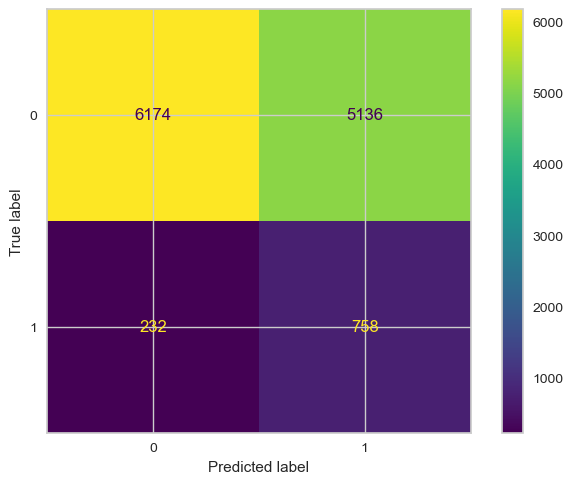

In [188]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [189]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Reconstituion du df X_test avec:
- AMNT_GOODS_PRICE
- y_true => y_test
- y_pred => colonne prédictions
- y_proba => en 2 colonnes proba_0 et proba_1 ou une sachant que proba_1=1 - proba_0


Ici copier d'abord y_test

In [190]:
X_test['y_true']=y_test
X_test

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship,y_true
30365,135240,0,1,90000.0,189000.0,9778.5,189000.0,1.0,0.624570,0.694881,NaN,46,12.0,1,1,1,0,1
135972,257728,0,1,157500.0,770292.0,32764.5,688500.0,3.0,0.834246,0.659922,NaN,45,5.0,1,1,1,1,0
296353,443369,1,1,166500.0,735003.0,24421.5,634500.0,3.0,NaN,0.576224,0.726711,45,15.0,1,1,1,1,0
197769,329313,0,0,157500.0,500427.0,27274.5,432000.0,2.0,0.167606,0.570163,0.495666,34,10.0,1,1,1,1,0
75415,187466,0,1,90000.0,191880.0,18976.5,180000.0,2.0,NaN,0.109505,0.641368,34,4.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287834,433455,1,1,128250.0,273636.0,18414.0,247500.0,3.0,0.504851,0.557240,0.619528,27,6.0,1,1,1,1,0
253578,393444,1,0,135000.0,450000.0,21888.0,450000.0,2.0,NaN,0.539462,0.212756,30,7.0,1,0,1,1,0
208236,341383,0,0,103500.0,1762110.0,48586.5,1575000.0,4.0,NaN,0.476659,0.586740,37,2.0,1,1,1,1,0
96556,212104,0,1,112500.0,545040.0,20677.5,450000.0,2.0,NaN,0.456828,0.300108,41,4.0,1,1,1,1,0


In [191]:
X_test['predictions']=y_pred
X_test

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship,y_true,predictions
30365,135240,0,1,90000.0,189000.0,9778.5,189000.0,1.0,0.624570,0.694881,NaN,46,12.0,1,1,1,0,1,0
135972,257728,0,1,157500.0,770292.0,32764.5,688500.0,3.0,0.834246,0.659922,NaN,45,5.0,1,1,1,1,0,0
296353,443369,1,1,166500.0,735003.0,24421.5,634500.0,3.0,NaN,0.576224,0.726711,45,15.0,1,1,1,1,0,0
197769,329313,0,0,157500.0,500427.0,27274.5,432000.0,2.0,0.167606,0.570163,0.495666,34,10.0,1,1,1,1,0,1
75415,187466,0,1,90000.0,191880.0,18976.5,180000.0,2.0,NaN,0.109505,0.641368,34,4.0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287834,433455,1,1,128250.0,273636.0,18414.0,247500.0,3.0,0.504851,0.557240,0.619528,27,6.0,1,1,1,1,0,0
253578,393444,1,0,135000.0,450000.0,21888.0,450000.0,2.0,NaN,0.539462,0.212756,30,7.0,1,0,1,1,0,1
208236,341383,0,0,103500.0,1762110.0,48586.5,1575000.0,4.0,NaN,0.476659,0.586740,37,2.0,1,1,1,1,0,1
96556,212104,0,1,112500.0,545040.0,20677.5,450000.0,2.0,NaN,0.456828,0.300108,41,4.0,1,1,1,1,0,1


In [192]:
X_test['proba_0']=y_proba[:,0]
X_test

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship,y_true,predictions,proba_0
30365,135240,0,1,90000.0,189000.0,9778.5,189000.0,1.0,0.624570,0.694881,NaN,46,12.0,1,1,1,0,1,0,0.685539
135972,257728,0,1,157500.0,770292.0,32764.5,688500.0,3.0,0.834246,0.659922,NaN,45,5.0,1,1,1,1,0,0,0.694166
296353,443369,1,1,166500.0,735003.0,24421.5,634500.0,3.0,NaN,0.576224,0.726711,45,15.0,1,1,1,1,0,0,0.783838
197769,329313,0,0,157500.0,500427.0,27274.5,432000.0,2.0,0.167606,0.570163,0.495666,34,10.0,1,1,1,1,0,1,0.429346
75415,187466,0,1,90000.0,191880.0,18976.5,180000.0,2.0,NaN,0.109505,0.641368,34,4.0,1,1,1,1,0,1,0.321580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287834,433455,1,1,128250.0,273636.0,18414.0,247500.0,3.0,0.504851,0.557240,0.619528,27,6.0,1,1,1,1,0,0,0.647443
253578,393444,1,0,135000.0,450000.0,21888.0,450000.0,2.0,NaN,0.539462,0.212756,30,7.0,1,0,1,1,0,1,0.252153
208236,341383,0,0,103500.0,1762110.0,48586.5,1575000.0,4.0,NaN,0.476659,0.586740,37,2.0,1,1,1,1,0,1,0.459232
96556,212104,0,1,112500.0,545040.0,20677.5,450000.0,2.0,NaN,0.456828,0.300108,41,4.0,1,1,1,1,0,1,0.292233


Ajout de la colonne nb d'annuité qui va nosu permettre de calculer le montant d'interet gagné ou perdu

In [193]:
X_test['nb_annuité']=round(X_test['AMT_CREDIT']/X_test['AMT_ANNUITY'],0)
X_test['nb_annuité'].describe()

count    12298.00000
mean        21.62685
std          7.82878
min          8.00000
25%         16.00000
50%         20.00000
75%         27.00000
max         45.00000
Name: nb_annuité, dtype: float64

In [194]:
X_test.loc[(X_test['y_true']==0) & (X_test['predictions']==1),:].head()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship,y_true,predictions,proba_0,nb_annuité
197769,329313,0,0,157500.0,500427.0,27274.5,432000.0,2.0,0.167606,0.570163,0.495666,34,10.0,1,1,1,1,0,1,0.429346,18.0
75415,187466,0,1,90000.0,191880.0,18976.5,180000.0,2.0,NaN,0.109505,0.641368,34,4.0,1,1,1,1,0,1,0.321580,10.0
112516,230532,1,1,135000.0,497520.0,36184.5,450000.0,2.0,0.711951,0.681699,0.374021,35,2.0,1,0,1,1,0,1,0.452362,14.0
240092,378074,1,1,130500.0,675000.0,22068.0,675000.0,1.0,NaN,0.468516,0.203252,56,-0.0,1,1,0,0,0,1,0.345747,31.0
82422,195595,1,1,157500.0,284400.0,20740.5,225000.0,4.0,0.112747,0.055906,0.675413,28,3.0,1,1,1,1,0,1,0.237263,14.0


X_test_2 ci dessous permet de remettre l'index à 0. 
- Plus facile pour tester les différentes fonction de calcul de gain

In [195]:
X_test_2=X_test.copy()

In [196]:
X_test_2.reset_index(inplace=True)

In [197]:
X_test_2.loc[(X_test_2['y_true']==0) & (X_test_2['predictions']==0),:].head()

,index,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship,y_true,predictions,proba_0,nb_annuité
1,135972,257728,0,1,157500.0,770292.0,32764.5,688500.0,3.0,0.834246,0.659922,NaN,45,5.0,1,1,1,1,0,0,0.694166,24.0
2,296353,443369,1,1,166500.0,735003.0,24421.5,634500.0,3.0,NaN,0.576224,0.726711,45,15.0,1,1,1,1,0,0,0.783838,30.0
5,79972,192712,1,0,180000.0,679500.0,66325.5,679500.0,3.0,0.483101,0.667637,0.673830,32,5.0,1,0,1,1,0,0,0.572629,10.0
7,130460,251329,1,0,202500.0,454500.0,14791.5,454500.0,2.0,NaN,0.705720,NaN,46,6.0,1,0,1,1,0,0,0.617336,31.0
8,270722,413847,1,1,247500.0,835380.0,40320.0,675000.0,4.0,0.827127,0.406120,NaN,41,1.0,1,1,1,0,0,0,0.546629,21.0


In [198]:
def calcul_gain_unit(ser, lost_coeff =0.3, taux=0.05): #y_true, y_pred
    
    '''Le but de cette fonction est de calculer le différentiel de gain grâce au modèle de prédiction comparé à la réalisation dans la vraie vie'''
        
    if ser['predictions']: # ==1 , pas de prêt
        if ser['y_true']: #==1; on ne perd plus d'argent grace au modèle de prédiction: gain
            return round(ser['AMT_CREDIT']-lost_coeff*ser['AMT_GOODS_PRICE'],2)
        else: # y_true = 0: on a refusé le crédit à tort: manque à gagner = interets non perçus = M*i*n (interets simples)
            return round(-(ser['AMT_CREDIT']*taux*ser['nb_annuité']),2)
    if not ser['predictions']: #==0, prêt accordé (pas de différence avec la réalité)
        return 0 
        #if y_true: #==1, prêt non remboursé, donc prêt accordé à tort=> perte = M-(30% * PP)
        #    return -(ser['AMT_CREDIT']-lost_coeff*ser['AMT_GOODS_PRICE'])
        #elif: # y_true = 0 pas de différence : le gain est le même avec et sans modèle de prédiction
        #    return 0
        
            
        

In [199]:
def calcul_gain_unit_1an(ser, lost_coeff =0.3, taux=0.05): #y_true, y_pred
    
    '''Variante de la fn calcul_gain_unit où l'on considère une seule annuité'''
        
    if ser['predictions']: # ==1 , pas de prêt
        if ser['y_true']: #==1; on ne perd plus d'argent grace au modèle de prédiction: gain
            return round(ser['AMT_CREDIT']-lost_coeff*ser['AMT_GOODS_PRICE'],2)
        else: # y_true = 0: on a refusé le crédit à tort: manque à gagner = interets non perçus = M*i*n (interets simples)
            return round(-(ser['AMT_CREDIT']*taux),2)
    if not ser['predictions']: #==0, prêt accordé (pas de différence avec la réalité)
        return 0 

Test fonction calcul_gain_unit

In [200]:
X_test.iloc[19].T

SK_ID_CURR          446167.000000
FLAG_OWN_CAR             1.000000
FLAG_OWN_REALTY          1.000000
AMT_INCOME_TOTAL    112500.000000
AMT_CREDIT          180000.000000
AMT_ANNUITY           9000.000000
AMT_GOODS_PRICE     180000.000000
CNT_FAM_MEMBERS          2.000000
EXT_SOURCE_1             0.243813
EXT_SOURCE_2             0.107221
EXT_SOURCE_3             0.835777
client_age              40.000000
client_prof_exp          3.000000
Cash_loans               0.000000
GENDER_FEMALE            0.000000
active_client            1.000000
relationship             1.000000
y_true                   0.000000
predictions              1.000000
proba_0                  0.389928
nb_annuité              20.000000
Name: 298789, dtype: float64

In [201]:
calcul_gain_unit(X_test.iloc[19].T)

-180000.0

In [202]:
def calcul_gain_total(df):
    df['Gain']=0
    for i in range(len(df)):
        #calcul_gain_unit(df.iloc[i].T)
        df['Gain'].iloc[i]=calcul_gain_unit(df.iloc[i].T)
    return round(df['Gain'].sum(),2)

Test fonction calcul_gain_total

In [203]:
calcul_gain_total(X_test)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-3228365914.39

Montant très négatif. Expliqué par:
- résultats mitigés du modèle (LogReg) => modèle à améliorer
- taux de récup et règle basée sur nb d'annuités 
- par le fait que l'on n'a pas les crédits refusés dans la réalité et qui auraient été octroyés grâce au modèle

Si 1 seule annuité

In [204]:
def calcul_gain_total_1an(df):
    df['Gain']=0
    for i in range(len(df)):
        #calcul_gain_unit(df.iloc[i].T)
        df['Gain'].iloc[i]=calcul_gain_unit_1an(df.iloc[i].T)
    return round(df['Gain'].sum(),2)

In [205]:
calcul_gain_total_1an(X_test)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


161580274.79

Cette fois on gagne

## 6.2 Calcul du gain brut

Version alternative: pour un crédit donné, calcul du gain ou de la perte, en focntion de la prédictions. Pas de notion de perte évitée ou de manque à gagner

In [206]:
def calcul_gain_gross(ser, lost_coeff =0.3, taux=0.05): #y_true, y_pred
    
    if ser['predictions']:
        return 0
    
    if not ser['y_true']: # == 0 > prêt accordé et remboursé: gains = interets
        return round(ser['AMT_CREDIT']*taux*ser['nb_annuité'],2)
    
    if ser['y_true']: # ==1 prêt accordé à tort : perte K  - vente des biens
        return round(-ser['AMT_CREDIT']-lost_coeff * ser['AMT_GOODS_PRICE'],2)

Test de la fn calcul_gain_gross

In [207]:
calcul_gain_gross(X_test.iloc[19].T)

0

In [208]:
X_test.iloc[0].T

SK_ID_CURR          135240.000000
FLAG_OWN_CAR             0.000000
FLAG_OWN_REALTY          1.000000
AMT_INCOME_TOTAL     90000.000000
AMT_CREDIT          189000.000000
AMT_ANNUITY           9778.500000
AMT_GOODS_PRICE     189000.000000
CNT_FAM_MEMBERS          1.000000
EXT_SOURCE_1             0.624570
EXT_SOURCE_2             0.694881
EXT_SOURCE_3                  NaN
client_age              46.000000
client_prof_exp         12.000000
Cash_loans               1.000000
GENDER_FEMALE            1.000000
active_client            1.000000
relationship             0.000000
y_true                   1.000000
predictions              0.000000
proba_0                  0.685539
nb_annuité              19.000000
Gain                     0.000000
Name: 30365, dtype: float64

In [209]:
calcul_gain_gross(X_test.iloc[0].T)

-245700.0

In [210]:
#gain=[]

In [211]:
def calcul_gain_total_1an(df):
    df['Gain']=0
    for i in range(len(df)):
        #calcul_gain_unit(df.iloc[i].T)
        df['Gain'].iloc[i]=calcul_gain_unit_1an(df.iloc[i].T)
    return round(df['Gain'].sum(),2)

In [213]:
#gain

In [214]:
def calcul_gain_gross_total(df):
    gain=[]
    gain_total = 0
    for i in range(len(df)):
        gain.append(calcul_gain_gross(df.iloc[i].T))
        
        #df['Gain_net'].iloc[i]=calcul_gain_unit(df.iloc[i].T)
        gain_total+=gain[i]
    return round(gain_total,2)

In [215]:
calcul_gain_gross_total(X_test)

4830425050.34

!!!! Ne fonctionne plus => A revoir

## 6.3 Optimisation du seuil de proba définissant que le crédit sera remboursé

In [216]:
def calcul_gain_proba_unit(ser,seuil=0.50, lost_coeff =0.3, taux=0.05): 
    
    if ser['proba_0'] < seuil:
        return 0    
            
    #if ser['predictions']:
    #    return 0
    
    
    
    if not ser['y_true']: # == 0 > prêt accordé et remboursé: gains = interets
        #Version où les interets sont perçus sur toutes les annuités
        #return round(ser['AMT_CREDIT']*taux*ser['nb_annuité'],2)
        
        #Version où l'on ne perçoit les int qu'une seule fois
        return round(ser['AMT_CREDIT']*taux,2)
    
    if ser['y_true']: # ==1 prêt accordé à tort : perte K  - vente des biens
        return round(-ser['AMT_CREDIT']-lost_coeff * ser['AMT_GOODS_PRICE'],2)

In [217]:
X_test_2.loc[(X_test_2['y_true']==0) & (X_test_2['predictions']==1),:].head()

,index,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship,y_true,predictions,proba_0,nb_annuité
3,197769,329313,0,0,157500.0,500427.0,27274.5,432000.0,2.0,0.167606,0.570163,0.495666,34,10.0,1,1,1,1,0,1,0.429346,18.0
4,75415,187466,0,1,90000.0,191880.0,18976.5,180000.0,2.0,NaN,0.109505,0.641368,34,4.0,1,1,1,1,0,1,0.321580,10.0
6,112516,230532,1,1,135000.0,497520.0,36184.5,450000.0,2.0,0.711951,0.681699,0.374021,35,2.0,1,0,1,1,0,1,0.452362,14.0
9,240092,378074,1,1,130500.0,675000.0,22068.0,675000.0,1.0,NaN,0.468516,0.203252,56,-0.0,1,1,0,0,0,1,0.345747,31.0
10,82422,195595,1,1,157500.0,284400.0,20740.5,225000.0,4.0,0.112747,0.055906,0.675413,28,3.0,1,1,1,1,0,1,0.237263,14.0


In [218]:
X_test_2.iloc[1].T

index               135972.000000
SK_ID_CURR          257728.000000
FLAG_OWN_CAR             0.000000
FLAG_OWN_REALTY          1.000000
AMT_INCOME_TOTAL    157500.000000
AMT_CREDIT          770292.000000
AMT_ANNUITY          32764.500000
AMT_GOODS_PRICE     688500.000000
CNT_FAM_MEMBERS          3.000000
EXT_SOURCE_1             0.834246
EXT_SOURCE_2             0.659922
EXT_SOURCE_3                  NaN
client_age              45.000000
client_prof_exp          5.000000
Cash_loans               1.000000
GENDER_FEMALE            1.000000
active_client            1.000000
relationship             1.000000
y_true                   0.000000
predictions              0.000000
proba_0                  0.694166
nb_annuité              24.000000
Name: 1, dtype: float64

In [219]:
calcul_gain_proba_unit(X_test.iloc[1].T,seuil=0.1)

38514.6

In [220]:
#calcul_gain_unit(X_test.iloc[2].T)

In [221]:
calcul_gain_gross(X_test.iloc[1].T)

924350.4

In [222]:
#def calcul_seuil_optimal(df):
#    best_thresh=pd.DataFrame(columns=['threshold','Gain_total'])
#    for thr,j in zip(np.arange(0,1,0.1),range(len(np.arange(0,1,0.1)))): 
#        gain=[]
#        gain_total = 0
      
#        for i in range(len(df)):
#            gain.append(calcul_gain_proba_unit(df.iloc[i].T,thr))
#            gain_total+=gain[i]

#        tmp=pd.DataFrame([[round(thr,1),gain_total]],columns=['threshold','Gain_total'])
#        
#        best_thresh=pd.concat([best_thresh,tmp],axis=0,ignore_index=True)

#    return best_thresh #gain_total

In [223]:
def calcul_seuil_optimal(df):
    best_thresh=pd.DataFrame(columns=['threshold','Gain_total'])
    #global best_thresh
    
    for thr,j in zip(np.arange(0,1,0.05),range(len(np.arange(0,1,0.05)))): 
        gain=[]
        gain_total = 0
        
        for i in range(len(df)):
            gain.append(calcul_gain_proba_unit(df.iloc[i].T,thr,taux=0.04,lost_coeff=0.3))
            gain_total+=gain[i]
        
        tmp=pd.DataFrame([[round(thr,2),gain_total]],columns=['threshold','Gain_total'])
        
        best_thresh=pd.concat([best_thresh,tmp],axis=0,ignore_index=True)
        
    return best_thresh #gain_total

In [224]:
thresh=calcul_seuil_optimal(X_test)
thresh

,threshold,Gain_total
0,0.00,-4.434289e+08
1,0.05,-4.384061e+08
2,0.10,-3.951266e+08
3,0.15,-3.525395e+08
4,0.20,-3.029101e+08
5,0.25,-2.406601e+08
6,0.30,-1.864062e+08
7,0.35,-1.409648e+08
8,0.40,-9.449560e+07
9,0.45,-6.634480e+07


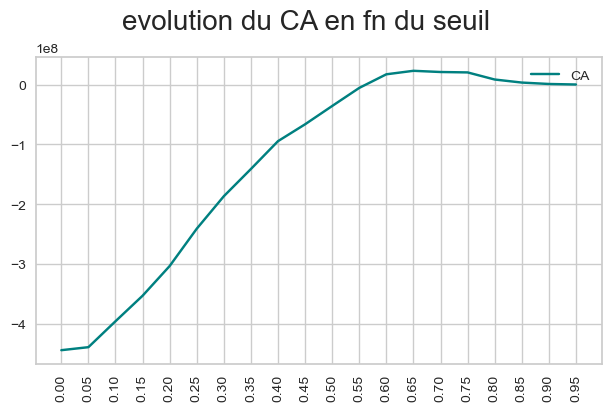

In [225]:
fig = plt.figure(figsize=(6,4),constrained_layout = True)
plt.plot(thresh['threshold'],thresh['Gain_total'], color='teal', label='CA')
#plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
listOf_Xticks = thresh['threshold']
plt.xticks(listOf_Xticks,rotation='vertical')
fig.suptitle('evolution du CA en fn du seuil', fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [232]:
thresh['Gain_total'].max()

22938712.560000017

In [234]:
thresh.loc[thresh['Gain_total']==thresh['Gain_total'].max(),:]

,threshold,Gain_total
13,0.65,22938712.56


In [235]:
X_train

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_age,client_prof_exp,Cash_loans,GENDER_FEMALE,active_client,relationship
91314,206054,0,0,112500.0,174132.0,18414.0,157500.0,2.0,NaN,0.173276,0.380800,59,-0.0,1,1,0,1
9822,111432,0,1,180000.0,1042560.0,34587.0,900000.0,2.0,0.559246,0.590694,NaN,53,-0.0,1,1,0,1
282639,427396,1,1,247500.0,521280.0,31630.5,450000.0,2.0,0.630077,0.700003,0.310818,52,7.0,1,1,1,1
211192,344753,0,1,180000.0,835380.0,40320.0,675000.0,2.0,0.531641,0.283880,0.609276,47,5.0,1,1,1,1
87914,202066,0,1,157500.0,835380.0,35523.0,675000.0,2.0,NaN,0.763463,0.468660,56,-0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277469,421528,1,0,112500.0,225000.0,11250.0,225000.0,2.0,NaN,0.300538,0.750375,49,21.0,0,0,1,1
294879,441647,0,0,112500.0,239850.0,23494.5,225000.0,2.0,NaN,0.461134,0.799297,66,-0.0,1,1,0,1
160750,286360,0,1,171000.0,558486.0,29475.0,517500.0,2.0,NaN,0.220116,0.300108,59,-0.0,1,1,0,1
304249,452526,1,0,157500.0,180000.0,9000.0,180000.0,2.0,0.254600,0.691215,0.740799,26,4.0,0,0,1,1


In [236]:
best_model

Pipeline(steps=[('sampler', RandomUnderSampler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('estimator', LogisticRegression())])